In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
%matplotlib inline

import pandas as pd
pd.options.display.max_colwidth = 300
pd.options.display.max_columns = 100


In [2]:
#Model File Directory
WORK_DIR = '/var/spark/ml_files/'

#Label Keys
LABEL = "success"

MODEL_TYPE = "ML-ECO"





In [3]:
# from cassandra
from cassandra.cluster import Cluster
cassandra_endpoint = '10.62.1.118'
cluster = Cluster([cassandra_endpoint])


In [4]:
eco = pd.read_csv(WORK_DIR + 'eco_2018_01_to_2019_03.csv')
eco.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,24,30,32,35,45,57,71) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3727687, 73)

In [4]:
eco_2019 =  pd.read_csv(WORK_DIR + 'eco_all_2019_01_to_03.csv')
eco_2019.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (25,42,53) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1522467, 69)

In [5]:
eco_2019_04_05 =  pd.read_csv(WORK_DIR + 'eco_2019_04_to_05.csv')
eco_2019_04_05.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(888489, 48)

In [7]:
eco_2019 = pd.concat([eco_2019, eco_2019_04_05], ignore_index=True)
eco_2019.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2410956, 69)

In [6]:
eco_bin_profile = pd.read_csv(WORK_DIR + 'eco_bin_profile_2019_Q1.csv')
eco_bin_profile.shape

(12831, 21)

In [105]:
eco_2019_06 =  pd.read_csv(WORK_DIR + 'eco_2019_06.csv')
eco_2019_06.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(136989, 48)

In [5]:
eco_2019.loc[eco_2019.added_expiry_years == 'STALE', 'added_expiry_years'] = 0
eco_2019['date_increment'].fillna(eco_2019['added_expiry_years'], inplace=True)

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

In [10]:
eco_2019['date_increment'].value_counts(dropna=False)

3      700883
0.0    403226
4.0    218146
5.0    117590
2.0     42069
1.0     20558
6       10965
3        9077
6         446
9         320
5          19
9          18
12         13
4           9
10          8
12          4
Name: date_increment, dtype: int64

In [6]:
eco_2019[eco_2019['date_increment'].isna()]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff
2,2,2,2,2,2019-02-15,acd,2463604509,8297439033,2019-02-15 06:17:16,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,NaN,NaN,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,Credit,KR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-bms,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],New,15252060500,2019-02-15 00:17:16,0,Authorize,0,1,False,3,21.088691,16.500000,6.990000,670.127693,19.128329,53.101640,55.919678,9.778057,2.398691,-2.190000,37.229678,16.729637
3,3,3,3,3,2019-02-15,acd,2463604509,8297439063,2019-02-15 06:17:18,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,RETRY_DECLINED.2,NaN,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,Credit,KR,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-seb,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],New,15252060500,2019-02-15 00:17:18,0,Authorize,0,1,False,3,21.088691,16.500000,6.990000,670.127693,19.128329,53.101640,55.919678,9.778057,2.398691,-2.190000,37.229678,16.729637
27,27,27,27,27,2019-02-15,adbehap,10204931501,8297618963,2019-02-15 06:39:05,3,NON3DS,KRUNGSRIAYUDHYA CARD CO. LTD.,TH,541690.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),0721,NaN,NaN,15,friday,c9aec547-0ddf-4569-b76a-cbbf2aa67c1d,NaN,Credit,TH,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,356.00,11.40,THB,MasterCard,netgiro-seb,1,356.00,11.40,THB,57994309000,0.0,SUCCESS[00] [T01541] [] [],New,18556574300,2019-02-15 00:39:05,0,Authorize,1,7,False,3,19.275552,11.348517,10.649066,56.400000,13.219650,51.749500,56.360704,10.800000,7.875552,-0.051483,44.960704,5.344098
28,28,28,28,28,2019-02-15,adbehap,10211010101,8297618593,2019-02-15 06:39:03,3,NON3DS,Prisma Medios de Pago S.A.,AR,450979.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0521,NaN,NaN,15,friday,94e16377-0398-4e9c-af02-43ac656ef07d,NaN,Credit,AR,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,88.83,2.32,ARS,Visa,netgiro-seb,6,88.83,2.32,ARS,57994307100,27001.0,Transaction refused[04] [000000] [] [],New,18232510800,2019-02-15 00:39:03,0,Authorize,0,5,False,3,7.654228,6.000000,0.978135,175.630639,7.137764,18.300000,27.971680,2.340000,5.334228,3.680000,25.651680,1.803536
29,29,29,29,29,2019-02-15,adbehap,10211010101,8297618873,2019-02-15 06:39:04,3,NON3DS,Prisma Medios de Pago S.A.,AR,450979.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0521,RETRY_DECLINED.2,NaN,15,friday,11901455-3a53-4fbf-a3fe-92fe018f801b,NaN,Credit,AR,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,88.83,2.32,ARS,Visa,netgiro-bms,6,88.83,2.32,ARS,57994307100,27050.0,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,18232510800,2019-02-15 00:39:04,0,Authorize,0,5,False,3,7.654228,6.000000,0.978135,175.63063

In [21]:
eco_2019['added_expiry_years'].value_counts(dropna=False)

3        645272
0        391135
4        188775
5        112561
2         60416
6         39985
3         21171
8         14643
0         12036
1         11839
4          7063
5          3746
10         3204
9          2977
12         1823
6          1730
2          1504
7          1314
8           870
1           372
9           262
12          203
11          126
10          120
15           98
7            49
11           11
15            8
-2            8
-3            7
STALE         7
-1            6
-5            4
13            3
-4            3
Name: added_expiry_years, dtype: int64

In [24]:
eco_2019.loc[eco_2019.added_expiry_years == 'STALE', 'added_expiry_years'] = 0

In [25]:
eco_2019[eco_2019['added_expiry_years'] == 'STALE']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff


In [14]:
eco_2019[eco_2019['subsegment_id'] == 19015722700].sort_values(by='transaction_date')  #  'merchant_descriptor', 'mid_entity_code',

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff
475135,475135,475135,475135,475135,2019-02-27,avgstore,13159458601,8370266393,2019-02-27 09:45:54,0,F5DCBB3D09F692D2,"Capital One Bank (Usa), National Association",US,480213.0,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),0317,NaN,0.0,27,wednesday,03a9ece1-fc2b-45d4-a378-69f6d741478f,2.54144e+06,Credit,US,DRI*AVG Technologies,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,127.49,127.49,USD,Visa,firstdata,1,127.49,127.49,USD,58535494400,530.0,51: DECLINED,New,19015722700,2019-02-27 03:45:54,3,Authorize,0,3,True,0,52.665966,49.99,2.49,3269.61,70.242077,119.99,243.6632,7.47,-74.824034,-77.5,116.1732,-4.581957
475136,475136,475136,475136,475136,2019-02-27,avgstore,13159458601,8370266513,2019-02-27 09:45:54,0,F5DCBB3D09F692D2,"Capital One Bank (Usa), National Association",US,480213.0,Visa,Visa Business,Business,Credit - True credit (No PIN/Signature capability),0317,RETRY_DECLINED.2,0.0,27,wednesday,68f51c45-d3c8-453e-ba7c-0dc96c9d4a07,2541443,Credit,US,DRI*AVG Technologies,7236114,DR_INC-ENTITY,Declined,DR_INC-ENTITY,127.49,127.49,USD,Visa,litle,1,127.49,127.49,USD,58535494400,530.0,349: Do Not Honor,New,19015722700,2019-02-27 03:45:54,3,Authorize,0,3,True,0,52.665966,49.99,2.49,3269.61,70.242077,119.99,243.6632,7.47,-74.824034,-77.5,116.1732,-4.581957


In [6]:
eco_2018_1 =  pd.read_csv(WORK_DIR + 'eco_2018_01_to_06.csv')
eco_2018_1.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1736634, 62)

In [300]:
eco_2018_1.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type
0,0,0,0,2018-01-20,acd,2413716209,6388240693,2018-01-20 00:28:08,4.0,NON3DS,DEUTSCHER SPARKASSEN UND GIROVERBAND,DE,523278.0,MasterCard,Platinum MasterCard Card,Consumer,True credit (No PIN/Signature capability),1221,NaN,NaN,20,saturday,aca47fa1-dbef-42ca-936e-f915d1823435,NaN,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,26.961000,EUR,MasterCard,netgiro-bms,3.0,22.00,26.961000,EUR,44459091600,27050,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,1.263641e+10,2018-01-20 00:28:08,0,Authorize,0,12.0,57.858307,56.686635,18.00,145.991145,27.411341,114.796519,126.957754,24.784154,Hard Fraud
1,1,1,1,2018-01-20,acd,2415167409,6388184303,2018-01-20 00:21:51,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,8479795e-5594-46e6-938c-8d78f9a24b7c,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,28.07,22.480581,AUD,MasterCard,nab,3.0,28.07,22.480581,AUD,44458413900,502,41: Lost card. Pick Up,New,1.264191e+10,2018-01-20 00:21:51,0,Authorize,0,4.0,61.885727,51.701357,1.93,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud
2,2,2,2,2018-01-20,acd,2415167509,6388184823,2018-01-20 00:21:54,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,bb50a32a-c1c2-4beb-bc57-6dc47cf0ff0d,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,23.85,19.100886,AUD,MasterCard,nab,3.0,23.85,19.100886,AUD,44458414000,502,41: Lost card. Pick Up,New,1.264195e+10,2018-01-20 00:21:54,0,Authorize,0,4.0,61.885727,51.701357,1.93,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud
3,3,6,6,2018-01-20,acd,3152102809,6388243743,2018-01-20 00:28:24,4.0,NON3DS,DZ Bank AG,DE,457038.0,Visa,Visa Gold,Consumer,True credit (No PIN/Signature capability),0321,NaN,4.0,20,saturday,57552c37-3553-4c72-a65a-395ad1dc06d6,334071.0,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,18.370245,EUR,Visa,netgiro-bms,1.0,14.99,18.370245,EUR,44459112600,0,SUCCESS[00] [495757] [111800] [111800],New,1.272463e+10,2018-01-20 00:28:24,0,Authorize,1,3.0,55.916105,55.003068,2.49,856.800000,28.585968,98.078539,131.571126,33.740000,Base
4,4,16,16,2018-01-20,acd,9650608401,6388549223,2018-01-20 01:17:04,4.0,NON3DS,EURO KARTENSYSTEME GMBH,DE,530548.0,MasterCard,MasterCard Prepaid Card (Non-US),Consumer,True credit (No PIN/Signature capability),1221,NaN,NaN,20,saturday,5253df2c-0c97-47f8-bcf7-3e67474f467b,NaN,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,15.96,19.558980,EUR,MasterCard,netgiro-bms,3.0,15.96,19.558980,EUR,44462843600,22053,Expired card.[54] [] [111800] [111800],New,1.264968e+10,2018-01-20 01:17:04,1,Authorize,0,12.0,35.934643,34.706060,2.49,200.000000,33.230149,91.423635,127.962341,2.490000,expired_card


In [7]:
eco_2018_2 =  pd.read_csv(WORK_DIR + 'eco_2018_07_to_12.csv')
eco_2018_2.shape

(2024716, 62)

In [258]:
eco_2018_1 = eco_2018_1[~eco_2018_1['added_expiry_years'].isna()]
eco_2018_1.shape

(2561632, 57)

In [330]:
eco_2018_1['years_over'] = eco_2018_1['added_expiry_years'].astype(int) - eco_2018_1['expired_years_diff'] 

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [431]:
eco_2018_1

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type,expired_years_diff,years_over
1,1,1,1,2018-01-20,acd,2415167409,6388184303,2018-01-20 00:21:51,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,8479795e-5594-46e6-938c-8d78f9a24b7c,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,28.07,22.480581,AUD,MasterCard,nab,3.0,28.07,22.480581,AUD,44458413900,502,41: Lost card. Pick Up,New,1.264191e+10,2018-01-20 00:21:51,0,Authorize,0,4.0,61.885727,51.701357,1.930000,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud,3,-3
2,2,2,2,2018-01-20,acd,2415167509,6388184823,2018-01-20 00:21:54,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,bb50a32a-c1c2-4beb-bc57-6dc47cf0ff0d,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,23.85,19.100886,AUD,MasterCard,nab,3.0,23.85,19.100886,AUD,44458414000,502,41: Lost card. Pick Up,New,1.264195e+10,2018-01-20 00:21:54,0,Authorize,0,4.0,61.885727,51.701357,1.930000,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud,3,-3
3,3,6,6,2018-01-20,acd,3152102809,6388243743,2018-01-20 00:28:24,4.0,NON3DS,DZ Bank AG,DE,457038.0,Visa,Visa Gold,Consumer,True credit (No PIN/Signature capability),0321,NaN,4.0,20,saturday,57552c37-3553-4c72-a65a-395ad1dc06d6,334071.0,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,18.370245,EUR,Visa,netgiro-bms,1.0,14.99,18.370245,EUR,44459112600,0,SUCCESS[00] [495757] [111800] [111800],New,1.272463e+10,2018-01-20 00:28:24,0,Authorize,1,3.0,55.916105,55.003068,2.490000,856.800000,28.585968,98.078539,131.571126,33.740000,Base,3,1
5,5,21,21,2018-01-20,acd,9699046801,6388661983,2018-01-20 01:30:51,3.0,F20EEE31D2ED5EE1,National Australia Bank Limited,AU,455701.0,Visa,Visa Platinum,Consumer,True credit (No PIN/Signature capability),04/20,NaN,3.0,20,saturday,e70aaa63-4673-45ec-8759-1cb43ac7e09a,299331.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,27.53,22.048108,AUD,Visa,nab,1.0,27.53,22.048108,AUD,44464188100,100,08: Approved,New,1.273704e+10,2018-01-20 01:30:51,1,Authorize,1,4.0,62.232748,54.300000,1.930000,3224.940605,91.169032,117.463514,247.505463,8.800000,Base,2,1
6,6,22,22,2018-01-20,acd,9699046901,6388662613,2018-01-20 01:30:56,3.0,F20EEE31D2ED5EE1,National Australia Bank Limited,AU,455701.0,Visa,Visa Platinum,Consumer,True credit (No PIN/Signature capability),04/20,NaN,3.0,20,saturday,460d1d05-a3dc-458e-bdd0-78424704f56b,299331.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,23.39,18.732483,AUD,Visa,nab,1.0,23.39,18.732483,AUD,44464190500,100,08: Approved,New,1.273704e+10,2018-01-20 01:30:56,1,Authorize,1,4.0,62.232748,54.300000,1.930000,3224.940605,91.169032,117.463514,247.505463,8.800000,Base,2,1
7,7,48,48,2018-01-20,adbecnn,6110135901,6388480793,2018-01-20 01:05:35,3.0,9FDEE0A3DC1A38E5,Bank of America - Commercial Credit,US,471529.0,Visa,Visa Purchasing,Purchase,True credit (No PIN/Signature capability),1120

In [331]:
eco_2018_2['years_over'] = eco_2018_2['added_expiry_years'].astype(int) - eco_2018_2['expired_years_diff'] 

In [338]:
# eco_2018_2[eco_2018_2['years_over'] == -6]

eco_2019['years_over'].value_counts()

 2     505147
 1     228179
-1     226269
 3     201898
 0     126616
-2      82542
 4      74475
-3      35316
-4      18462
-5       7770
 5       6435
-6       4911
-7        934
-8        895
-9        645
 6        589
-10       481
 7        239
-11       204
 8        181
 9        156
 10        64
 11        41
-12         8
 12         6
-13         4
Name: years_over, dtype: int64

In [45]:
df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')
df_decline_type

,DECLINE_TEXT,DECLINE_TYPE
0,27001: Transaction refused[12] [06059I] [] [C],Base
1,27001: Transaction refused[12] [06081I] [] [C],Base
2,27001: Transaction refused[12] [060820] [] [C],Base
3,27001: Transaction refused[12] [06095B] [] [C],Base
4,27001: Transaction refused[12] [061185] [] [C],Base
5,27001: Transaction refused[12] [061392] [] [C],Base
6,27001: Transaction refused[12] [06150I] [] [C],Base
7,27001: Transaction refused[12] [06187I] [] [C],Base
8,27001: Transaction refused[12] [062237] [] [C],Base
9,27001: Transaction refused[12] [06225D] [] [C],Base


In [46]:
def decline_type(response_msg):
    '''Converts to decline_type based on the given response_msg'''
    dec_type = df_decline_type[df_decline_type['DECLINE_TEXT'] == response_msg]['DECLINE_TYPE']
    if dec_type.empty or dec_type.iloc[0] == 'Base' :
        return group_response_msg(response_msg)
    else:
        return dec_type.iloc[0]
    
msg_group = { 'declined' : 'decline', 
             'do_not_honor' : 'do not honor', 
             'txn_refused' : 'refuse', 
             'attempt_lower_amount' : 'lower amount',
            'Insufficient Funds' : 'insufficient',
            'not_allowed' : 'not allowed',
            'correct_cc_retry' : 'correct card',
            'invalid_cc' : 'invalid card',
            'lost_stolen' : 'lost or stolen',
            'invalid_account' : 'invalid account',
            'do_not_try' : 'do not try',
            'expired_card' : 'expired',
            'pickup_card' : 'pick',
            'blocked_first_used' : 'blocked',
            'invalid_txn' : 'invalid trans',
            'restricted_card' : 'restricted',
            'not_permitted' : 'not permitted',
            'expired card' : 'expired card',
            'unable to determine format' : 'determine format',
            'system error' : 'error',
            'no reply' : 'no reply',
             'no charge model found' : 'no charge model found',
             'issuer unavailable' : 'issuer unavailable',
             'litle http response code' : 'litle http response code',
             'corrupt input data to server' : 'corrupt input data to server',
             'ioexception' : 'ioexception',
             'invalid merchant' : 'invalid merchant',
            }

def group_response_msg(msg):
    other = 'Base'
    if isinstance(msg, str) == False:
        return other
    
    msg_lower = msg.lower()
    for key, val in msg_group.items():
        if val in msg_lower:
            return key
        
    return other   
    
# eco_2018_1['decline_type'] = eco_2018_1['response_message'].apply(decline_type)
# eco_2018_2['decline_type'] = eco_2018_2['response_message'].apply(decline_type)
# eco_2019_06['decline_type'] = eco_2019_06['response_message'].apply(decline_type)
eco_2019['decline_type'] = eco_2019['response_message'].apply(decline_type)

In [47]:
eco_2019.head()

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over,decline_type
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,0,0.0,0.0,0.0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,NaN,0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,netgiro-bms,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize,-2.0,txn_refused
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,1,1.0,1.0,1.0,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,RETRY_DECLINED.2,0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,drwp-fd,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize,-2.0,txn_refused
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,2,2.0,2.0,2.0,2.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,NaN,3,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-bms,2019-02-15,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,15252060500,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize,3.0,expired_card
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,3,3.0,3.0,3.0,3.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,RETRY_DECLINED.2,3,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-seb,2019-02-15,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,15252060500,0,2019-02-15 06:17:18,2019-02-15 00:17:18,0,8297439063,Authorize,3.0,txn_refused
4,458.470000,96.428067,125.702347,53.852172,51.833908,2.99,24.747377,25.066976,4,4.0,4.0,4.0,4.0,0,0,NON3DS,BAWAG P.S.K. BANK,AT,526624,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),716,7,NaN,0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,3.0,Credit,True,AT,108.812347,36.962172,34.943908,DRI*ACD Systems,1411163460,DR_IRELAND

In [48]:
eco_2019.to_csv(WORK_DIR + 'eco_2019_01_to_05.csv')

In [266]:
eco_2018_1.head()

,Unnamed: 0,Unnamed: 0.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type
0,0,0,2018-01-20,acd,2413716209,6388240693,2018-01-20 00:28:08,4.0,NON3DS,DEUTSCHER SPARKASSEN UND GIROVERBAND,DE,523278.0,MasterCard,Platinum MasterCard Card,Consumer,True credit (No PIN/Signature capability),1221,NaN,NaN,20,saturday,aca47fa1-dbef-42ca-936e-f915d1823435,NaN,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,26.961000,EUR,MasterCard,netgiro-bms,3.0,22.00,26.961000,EUR,44459091600,27050,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,1.263641e+10,2018-01-20 00:28:08,0,Authorize,0,12.0,57.858307,56.686635,18.00,145.991145,27.411341,114.796519,126.957754,24.784154,Hard Fraud
1,1,1,2018-01-20,acd,2415167409,6388184303,2018-01-20 00:21:51,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,8479795e-5594-46e6-938c-8d78f9a24b7c,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,28.07,22.480581,AUD,MasterCard,nab,3.0,28.07,22.480581,AUD,44458413900,502,41: Lost card. Pick Up,New,1.264191e+10,2018-01-20 00:21:51,0,Authorize,0,4.0,61.885727,51.701357,1.93,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud
2,2,2,2018-01-20,acd,2415167509,6388184823,2018-01-20 00:21:54,0.0,08E05329BF07DB7C,COMMONWEALTH BANK OF AUSTRALIA,AU,552033.0,MasterCard,Titanium MasterCard Card,Consumer,True credit (No PIN/Signature capability),04/15,NaN,0.0,20,saturday,bb50a32a-c1c2-4beb-bc57-6dc47cf0ff0d,197641.0,Credit,AU,DRI*ACD Systems,I7A0010,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,23.85,19.100886,AUD,MasterCard,nab,3.0,23.85,19.100886,AUD,44458414000,502,41: Lost card. Pick Up,New,1.264195e+10,2018-01-20 00:21:54,0,Authorize,0,4.0,61.885727,51.701357,1.93,4151.000000,121.511270,119.503742,284.210435,4.987706,Hard Fraud
3,6,6,2018-01-20,acd,3152102809,6388243743,2018-01-20 00:28:24,4.0,NON3DS,DZ Bank AG,DE,457038.0,Visa,Visa Gold,Consumer,True credit (No PIN/Signature capability),0321,NaN,4.0,20,saturday,57552c37-3553-4c72-a65a-395ad1dc06d6,334071.0,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,18.370245,EUR,Visa,netgiro-bms,1.0,14.99,18.370245,EUR,44459112600,0,SUCCESS[00] [495757] [111800] [111800],New,1.272463e+10,2018-01-20 00:28:24,0,Authorize,1,3.0,55.916105,55.003068,2.49,856.800000,28.585968,98.078539,131.571126,33.740000,Base
4,16,16,2018-01-20,acd,9650608401,6388549223,2018-01-20 01:17:04,4.0,NON3DS,EURO KARTENSYSTEME GMBH,DE,530548.0,MasterCard,MasterCard Prepaid Card (Non-US),Consumer,True credit (No PIN/Signature capability),1221,NaN,NaN,20,saturday,5253df2c-0c97-47f8-bcf7-3e67474f467b,NaN,Credit,DE,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,15.96,19.558980,EUR,MasterCard,netgiro-bms,3.0,15.96,19.558980,EUR,44462843600,22053,Expired card.[54] [] [111800] [111800],New,1.264968e+10,2018-01-20 01:17:04,1,Authorize,0,12.0,35.934643,34.706060,2.49,200.000000,33.230149,91.423635,127.962341,2.490000,expired_card


In [328]:
eco_2018_2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type,expired_years_diff
0,0,3,3,2018-07-05,acd,10289267701,7010595233,2018-07-05 07:28:15,0.0,RB,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,NaN,0.0,5,thursday,35185729-c017-42b7-bb7b-936e5a41b85e,3788691.0,Debit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bnp,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [] [],New,13739217000,2018-07-05 02:28:15,2,Authorize,0,10.0,51.544971,56.856817,2.99,124.627536,30.225956,92.929982,116.086890,2.990000,txn_refused,1
1,1,4,4,2018-07-05,acd,10289267701,7010595363,2018-07-05 07:28:17,0.0,NON3DS,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,RETRY_DECLINED.2,0.0,5,thursday,9d6b1306-414f-4fc8-9f9b-d94b1daed59e,3788691.0,Debit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bms,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [111800] [111800],New,13739217000,2018-07-05 02:28:17,2,Authorize,0,10.0,51.544971,56.856817,2.99,124.627536,30.225956,92.929982,116.086890,2.990000,txn_refused,1
2,2,16,16,2018-07-05,acd,2770445809,7010266473,2018-07-05 05:50:58,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,bd8a8f82-7d2d-4709-870e-220ecff8ad83,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,22.00,25.612400,EUR,MasterCard,netgiro-bms,1.0,22.00,25.612400,EUR,49622118500,0.0,SUCCESS[00] [754746] [111800] [111800],New,13728444700,2018-07-05 00:50:58,0,Authorize,1,7.0,54.448239,52.125550,2.68,1414.070000,35.996791,101.154272,136.788000,11.981007,Base,2
3,3,17,17,2018-07-05,acd,2770445909,7010266373,2018-07-05 05:50:55,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,42afd494-ea38-4e5d-b481-396f9251554a,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,17.451358,EUR,MasterCard,netgiro-bms,1.0,14.99,17.451358,EUR,49622124100,0.0,SUCCESS[00] [209045] [111800] [111800],New,13728417200,2018-07-05 00:50:55,0,Authorize,1,7.0,54.448239,52.125550,2.68,1414.070000,35.996791,101.154272,136.788000,11.981007,Base,2
4,4,23,23,2018-07-05,acd,3387636201,7010517633,2018-07-05 07:14:28,0.0,RB,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,NaN,0.0,5,thursday,914dbf43-bb8d-4238-b7c5-f73c9b7d992c,3787161.0,Credit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,25.612400,EUR,Visa,netgiro-bnp,3.0,22.00,25.612400,EUR,49625022900,27001.0,Transaction refused[56] [] [] [],New,13633339400,2018-07-05 02:14:28,2,Authorize,0,9.0,59.978698,58.663265,2.99,176.247604,21.304532,94.006648,114.602297,40.363764,txn_refused,1


In [342]:
# eco_2019[eco_2019['success'] == 1].head(5).to_csv('eco_success.csv')

In [49]:
excludes = ['unable to determine format', 'attempt_lower_amount', 'Stop Recurring', 'no reply', 'litle http response code', 'ioexception', 'invalid merchant', 'issuer unavailable', 'no charge model found', 'corrupt input data to server', 'Insufficient Funds']

# eco_2018_1 = eco_2018_1[~eco_2018_1['decline_type'].isin(excludes)]
# eco_2018_2 = eco_2018_2[~eco_2018_2['decline_type'].isin(excludes)]

# eco_2018_2.shape

eco_2019 = eco_2019[~eco_2019['decline_type'].isin(excludes)]
eco_2019.shape

(2374238, 70)

In [269]:
eco_2018_1 = eco_2018_1[~(eco_2018_1['bin'].isna())]
eco_2018_1 = eco_2018_1[ ~((eco_2018_1['issuer_country'].isna()) & (eco_2018_1['billing_country'].isna()))]
eco_2018_1['success'].value_counts(normalize=True)

0    0.836498
1    0.163502
Name: success, dtype: float64

In [319]:
eco_2018_2 = eco_2018_2[~(eco_2018_2['bin'].isna())]
eco_2018_2 = eco_2018_2[ ~((eco_2018_2['issuer_country'].isna()) & (eco_2018_2['billing_country'].isna()))]
eco_2018_2['success'].value_counts(normalize=True)

0    0.847822
1    0.152178
Name: success, dtype: float64

In [8]:
eco = pd.concat([eco_2019, eco_2018_1, eco_2018_2], ignore_index=True)
eco['cc_expiration_date'] = eco['cc_expiration_date'].apply(str)
eco.shape

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(5283817, 70)

In [353]:
# eco[eco['decline_type'].isna()]['received_date'].value_counts()
# eco['date_increment'].value_counts(dropna=False)

# eco[eco['bin'].isna()].shape
eco.shape

(5283817, 69)

In [14]:
FEATURES_FLOAT = ['bin']
# FEATURES_FLOAT = ['bin', 'added_expiry_years', 'date_increment']
# FEATURES_FLOAT = ['cc_expiration_date']
def handle_feat_float(df):
        for feat in FEATURES_FLOAT:
            if feat in FEATURES_FLOAT:
                df[feat] = df[feat].apply(str).str.replace('.0', '', regex=False)
        return df

# handle_feat_float(eco)    
# handle_feat_float(bin_profile)    
handle_feat_float(eco_bin_profile)
# handle_feat_float(eco_2019)
# retry_success.head()

,bin,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9
0,370034,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN
1,370266,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,370276,NaN,NaN,NaN,0.000000,37.333333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,37.333333,0.000000,NaN,NaN,NaN,NaN
3,370277,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,370781,NaN,NaN,NaN,20.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
5,370783,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,371013,0.000000,NaN,NaN,NaN,25.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN
7,371016,0.000000,NaN,NaN,NaN,41.666667,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.222222,NaN,NaN,NaN,NaN,NaN
8,371017,0.000000,NaN,NaN,NaN,33.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,371018,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN


In [ ]:
def expired_years_diff(row):
    try:
        datestr = row['cc_expiration_date']
        datestr = str(datestr).replace('/','')
        struct = time.strptime(datestr, "%m%y")
        original_year = struct.tm_year
        txn_year = time.strptime(row['transaction_date_in_string'], '%Y-%m-%d %H:%M:%S').tm_year
        return abs(txn_year - original_year)
    except:
        return -1
    
# eco_2018_1['expired_years_diff'] = eco_2018_1.apply(expired_years_diff, axis=1)   
eco_2018_2['expired_years_diff'] = eco_2018_2.apply(expired_years_diff, axis=1) 

In [322]:
eco_2018_2.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type,expired_years_diff
0,0,3,3,2018-07-05,acd,10289267701,7010595233,2018-07-05 07:28:15,0.0,RB,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,NaN,0.0,5,thursday,35185729-c017-42b7-bb7b-936e5a41b85e,3788691.0,Debit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bnp,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [] [],New,13739217000,2018-07-05 02:28:15,2,Authorize,0,10.0,51.544971,56.856817,2.99,124.627536,30.225956,92.929982,116.086890,2.990000,txn_refused,1
1,1,4,4,2018-07-05,acd,10289267701,7010595363,2018-07-05 07:28:17,0.0,NON3DS,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,RETRY_DECLINED.2,0.0,5,thursday,9d6b1306-414f-4fc8-9f9b-d94b1daed59e,3788691.0,Debit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bms,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [111800] [111800],New,13739217000,2018-07-05 02:28:17,2,Authorize,0,10.0,51.544971,56.856817,2.99,124.627536,30.225956,92.929982,116.086890,2.990000,txn_refused,1
2,2,16,16,2018-07-05,acd,2770445809,7010266473,2018-07-05 05:50:58,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,bd8a8f82-7d2d-4709-870e-220ecff8ad83,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,22.00,25.612400,EUR,MasterCard,netgiro-bms,1.0,22.00,25.612400,EUR,49622118500,0.0,SUCCESS[00] [754746] [111800] [111800],New,13728444700,2018-07-05 00:50:58,0,Authorize,1,7.0,54.448239,52.125550,2.68,1414.070000,35.996791,101.154272,136.788000,11.981007,Base,2
3,3,17,17,2018-07-05,acd,2770445909,7010266373,2018-07-05 05:50:55,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,42afd494-ea38-4e5d-b481-396f9251554a,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,17.451358,EUR,MasterCard,netgiro-bms,1.0,14.99,17.451358,EUR,49622124100,0.0,SUCCESS[00] [209045] [111800] [111800],New,13728417200,2018-07-05 00:50:55,0,Authorize,1,7.0,54.448239,52.125550,2.68,1414.070000,35.996791,101.154272,136.788000,11.981007,Base,2
4,4,23,23,2018-07-05,acd,3387636201,7010517633,2018-07-05 07:14:28,0.0,RB,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,NaN,0.0,5,thursday,914dbf43-bb8d-4238-b7c5-f73c9b7d992c,3787161.0,Credit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,25.612400,EUR,Visa,netgiro-bnp,3.0,22.00,25.612400,EUR,49625022900,27001.0,Transaction refused[56] [] [] [],New,13633339400,2018-07-05 02:14:28,2,Authorize,0,9.0,59.978698,58.663265,2.99,176.247604,21.304532,94.006648,114.602297,40.363764,txn_refused,1


In [323]:
# eco_2018_1 = eco_2018_1[~(eco_2018_1['expired_years_diff'] == -1)]
eco_2018_2 = eco_2018_2[~(eco_2018_2['expired_years_diff'] == -1)]

In [324]:
# eco_2018_1 = eco_2018_1[~(eco_2018_1['date_increment'].isna())]
# eco_2018_1.shape

eco_2018_2 = eco_2018_2[~(eco_2018_2['date_increment'].isna())]
eco_2018_2.shape

(2024716, 60)

In [339]:
eco_2018_2.to_csv(WORK_DIR + 'eco_2018_07_to_12.csv')
eco_2018_1.to_csv(WORK_DIR + 'eco_2018_01_to_06.csv')

In [259]:
eco_2018_2 = eco_2018_2[~eco_2018_2['added_expiry_years'].isna()]
eco_2018_2

,Unnamed: 0,Unnamed: 0.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1
0,3,3,2018-07-05,acd,10289267701,7010595233,2018-07-05 07:28:15,0.0,RB,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,NaN,0.0,5,thursday,35185729-c017-42b7-bb7b-936e5a41b85e,3788691.0,Debit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bnp,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [] [],New,13739217000,2018-07-05 02:28:15,2,Authorize,0,10.0,51.544971,56.856817,2.990000,124.627536,30.225956,92.929982,116.086890,2.990000
1,4,4,2018-07-05,acd,10289267701,7010595363,2018-07-05 07:28:17,0.0,NON3DS,Societe Generale S.A.,FR,415056.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,1017,RETRY_DECLINED.2,0.0,5,thursday,9d6b1306-414f-4fc8-9f9b-d94b1daed59e,3788691.0,Debit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.99,22.108158,EUR,Visa,netgiro-bms,1.0,18.99,22.108158,EUR,49625818400,27001.0,Transaction refused[05] [] [111800] [111800],New,13739217000,2018-07-05 02:28:17,2,Authorize,0,10.0,51.544971,56.856817,2.990000,124.627536,30.225956,92.929982,116.086890,2.990000
2,16,16,2018-07-05,acd,2770445809,7010266473,2018-07-05 05:50:58,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,bd8a8f82-7d2d-4709-870e-220ecff8ad83,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,22.00,25.612400,EUR,MasterCard,netgiro-bms,1.0,22.00,25.612400,EUR,49622118500,0.0,SUCCESS[00] [754746] [111800] [111800],New,13728444700,2018-07-05 00:50:58,0,Authorize,1,7.0,54.448239,52.125550,2.680000,1414.070000,35.996791,101.154272,136.788000,11.981007
3,17,17,2018-07-05,acd,2770445909,7010266373,2018-07-05 05:50:55,3.0,NON3DS,UBS SWITZERLAND AG,CH,510197.0,MasterCard,MasterCard World Card,Consumer,True credit (No PIN/Signature capability),0720,NaN,3.0,5,thursday,42afd494-ea38-4e5d-b481-396f9251554a,3800941.0,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,17.451358,EUR,MasterCard,netgiro-bms,1.0,14.99,17.451358,EUR,49622124100,0.0,SUCCESS[00] [209045] [111800] [111800],New,13728417200,2018-07-05 00:50:55,0,Authorize,1,7.0,54.448239,52.125550,2.680000,1414.070000,35.996791,101.154272,136.788000,11.981007
4,23,23,2018-07-05,acd,3387636201,7010517633,2018-07-05 07:14:28,0.0,RB,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,NaN,0.0,5,thursday,914dbf43-bb8d-4238-b7c5-f73c9b7d992c,3787161.0,Credit,FR,DRI*ACD Systems,1785390597,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,22.00,25.612400,EUR,Visa,netgiro-bnp,3.0,22.00,25.612400,EUR,49625022900,27001.0,Transaction refused[56] [] [] [],New,13633339400,2018-07-05 02:14:28,2,Authorize,0,9.0,59.978698,58.663265,2.990000,176.247604,21.304532,94.006648,114.602297,40.363764
5,24,24,2018-07-05,acd,3387636201,7010517833,2018-07-05 07:14:30,0.0,NON3DS,BPCE,FR,497886.0,Visa,Visa Classic,Consumer,True credit (No PIN/Signature capability),0917,RETRY_DECLINED.2,0.0,5,thursday,44b71e27-3920-4193-9e6f-2d36de708ad0,3787161.0,Credit,FR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_

In [287]:
# eco_2018_1 = eco_2018_1[~eco_2018_1['expired_years_diff'] == -1 ]
# eco_2018_1.shape

eco_2018_2 = eco_2018_2[~eco_2018_2['expired_years_diff'] == -1 ]
eco_2018_2.shape

# eco_2018_2[eco_2018_2['expired_years_diff'] == -1 ].shape

(302254, 59)

In [298]:
# eco_2018_1[~eco_2018_1['date_increment'].isna()]
eco_2018_2[~eco_2018_2['date_increment'].isna()]

,Unnamed: 0,Unnamed: 0.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,decline_type,expired_years_diff
324,8462,8462,2018-07-05,adbehap,2308197909,7010282203,2018-07-05 06:01:59,3.0,NON3DS,NaN,SG,376201.0,American Express,NaN,NaN,True credit (No PIN/Signature capability),0918,NaN,3.0,5,thursday,b810968c-1b37-455c-8f46-5ff2de60a348,3892521.0,NaN,NaN,DRI*Adobe Sales,1229148012,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,26.00,19.048015,SGD,AmericanExpress,netgiro-amex,1.0,26.00,19.048015,SGD,49622211900,0.0,SUCCESS[000] [189041] [] [],New,16407034400,2018-07-05 01:01:59,1,Authorize,1,9.0,27.839611,14.700000,2.490000,1249.360000,62.325495,50.211701,270.755565,9.500000,Base,0
466,9209,9209,2018-07-05,adbehap,3634689001,7010324253,2018-07-05 06:30:38,0.0,NON3DS,COMMONWEALTH BANK OF AUSTRALIA,IN,535316.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,True credit (No PIN/Signature capability),0618,NaN,0.0,5,thursday,834cf7ec-b9ae-455f-972d-9025e851ba49,3804401.0,Credit,AU,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,797.68,11.604322,INR,MasterCard,netgiro-seb,1.0,797.68,11.604322,INR,49622633400,0.0,SUCCESS[00] [055451] [] [],New,16407293900,2018-07-05 01:30:38,1,Authorize,1,6.0,61.898641,56.880000,1.107132,2389.996524,48.698069,116.612367,163.583838,17.476431,Base,0
1049,21278,21278,2018-07-05,adbehkr,10262603901,7010538913,2018-07-05 07:16:56,0.0,NON3DS,U.S. Bank National Association-Credit,KR,403784.0,Visa,Visa Traditional,Consumer,True credit (No PIN/Signature capability),518,NaN,0.0,5,thursday,952fd47a-24c8-4bea-aff7-b64202d9e7f5,3838011.0,Credit,US,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_KOREA-ENTITY,35200.00,31.493883,KRW,Visa,netgiro-seb,2.0,35200.00,31.493883,KRW,49625239500,27001.0,Transaction refused[62] [000000] [] [],New,16339877800,2018-07-05 02:16:56,2,Authorize,0,5.0,62.451847,63.590000,2.490000,468.000000,34.147793,109.990000,169.590000,9.990000,Hard Fraud,0
1050,21279,21279,2018-07-05,adbehkr,10262603901,7010539103,2018-07-05 07:16:58,0.0,NON3DS,U.S. Bank National Association-Credit,KR,403784.0,Visa,Visa Traditional,Consumer,True credit (No PIN/Signature capability),518,RETRY_DECLINED.2,0.0,5,thursday,87f0b093-e6dd-4281-ac58-f60d2140c707,3838011.0,Credit,US,DRI*Adobe Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_KOREA-ENTITY,35200.00,31.493883,KRW,Visa,netgiro-bms,2.0,35200.00,31.493883,KRW,49625239500,27050.0,Do not try again/use alternate payment card.[62] [] [144800] [144800],New,16339877800,2018-07-05 02:16:58,2,Authorize,0,5.0,62.451847,63.590000,2.490000,468.000000,34.147793,109.990000,169.590000,9.990000,Hard Fraud,0
1167,25848,25848,2018-07-05,adbehkr,9244826301,7010401763,2018-07-05 06:51:21,0.0,NON3DS,National Westminster Bank PLC,KR,475129.0,Visa,Visa Classic,Consumer,NON USA Consumer Debit - No Pin Access,518,NaN,0.0,5,thursday,b455ba54-067a-4f17-8893-32eafa12f78a,3786981.0,Debit,GB,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_KOREA-ENTITY,35200.00,31.493883,KRW,Visa,netgiro-seb,2.0,35200.00,31.493883,KRW,49623596400,27001.0,Transaction refused[05] [000000] [] [],New,16337445700,2018-07-05 01:51:21,1,Authorize,0,5.0,55.575352,55.531886,2.791710,2258.200000,30.287761,97.165780,127.568242,10.308358,txn_refused,0
1168,25849,25849,2018-07-05,adbehkr,9244826301,7010401893

In [26]:
eco['success'].value_counts(normalize=True)

0    0.84841
1    0.15159
Name: success, dtype: float64

In [ ]:
eco['date_increment'].value_counts(dropna=False)

In [40]:
eco['added_expiry_years'].value_counts()

3        645272
0        391135
4        188775
5        112561
2         60416
6         39985
3         21171
8         14643
0         12036
1         11839
4          7063
5          3746
10         3204
9          2977
12         1823
6          1730
2          1504
7          1314
8           870
1           372
9           262
12          203
11          126
10          120
15           98
7            49
11           11
15            8
-2            8
STALE         7
-3            7
-1            6
-5            4
13            3
-4            3
Name: added_expiry_years, dtype: int64

In [11]:
bin_profile = pd.read_csv(WORK_DIR + 'bin_profile_2018_01_to_2019_03.csv')
bin_profile.shape

(38193, 13)

In [50]:
original_size = len(eco_2019)
# balanced_size = len(retry_success_balanced_all)
fail_size = eco_2019[LABEL].value_counts(normalize=True)[0.0]
success_size =  eco_2019[LABEL].value_counts(normalize=True)[1.0]

In [6]:
original_size = len(eco)
# balanced_size = len(retry_success_balanced_all)
fail_size = eco[LABEL].value_counts(normalize=True)[0.0]
success_size =  eco[LABEL].value_counts(normalize=True)[1.0]

In [99]:
#import for training
import numpy as np
from sklearn import cross_validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import linear_model
from sklearn import tree
from sklearn import cross_validation
from sklearn import ensemble
from sklearn import linear_model
from sklearn import svm
from sklearn.dummy import DummyClassifier
# from sklearn.model_selection import GridSearchCV
from spark_sklearn import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier

# from src.web.utils import PreProcessing
from src.web.preprocessing import PreProcessing
from src.web.encoder import EnhancedLeaveOneOutEncoder
from src.web.train_util import *

In [52]:
INPUT_FEATURES = {
            "billing_country": {
                "type": "string"
            },
            "bin": {
                "type": "string"
            },
            "card_brand": {
                "type": "string"
            },
            "card_category": {
                "type": "string"
            },
            "card_class": {
                "type": "string"
            },
            "card_usage": {
                "type": "string"
            },
            "cc_expiration_date": {
                "type": "string"
            },
            "day_of_month": {
                "type": "integer"
            },
            "funding_source": {
                "type": "string"
            },
            "issuer_country": {
                "type": "string"
            },
            "payment_amount_usd": {
                "type": "number"
            },
            "payment_currency": {
                "type": "string"
            },
            "payment_method_id": {
                "type": "string"
            },
            "transaction_date_in_string": {
                "type": "string"
            },
            "bank_name": {
                "type": "string"
            }
        }

In [12]:
eco = pd.merge(eco, bin_profile[['bin','Mean', 'Median','Min','Max','StdDev','Max_95','Max_99','Min_1']], left_on='bin', right_on='bin', how='left')

eco.shape  #10761324, 61   7343847, 63

(1523351, 60)

In [252]:
gp = eco_2019.groupby(['merchant_descriptor', 'merchant_number'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]

success         \
                                                              sum  count   
merchant_descriptor  merchant_number                                       
DRI*Adobe Sales      1229148012                              1432   1607   
DRI*CrashPlan for SB Digital_River_Software                   475    624   
DRI*Adobe Sales      1156962062-SGD-pacific                   713    940   
DRI*Trend Micro      941000108063_00000001                   3167   4291   
DRI*CrashPlan for SB 1411163460                               604    838   
DRI*Adobe Sales      1411163460-HKD-pacific                   907   1272   
DRI*AVAST Software   941000108063_00000001                   2075   3024   
DRI*Trend Micro      941000108071_00000001                   6380   9350   
DRI*Autodesk, Inc.   I7A0010                                  373    558   
DRI*AVAST Software   941000108071_00000001                   3735   5727   
DRI*CrashPlan for SB 311009012882                             402    623   
DRI*Trend Micro      7319737                                  726   1254   
                     1411163460-NZD-pacific                   290    520   
DRI*Adobe Sales      1156962062-PHP-pacific                   307    551   
DRI*TOTALDEFENSE     I7A0010                                 1747   3159   
DRI*Adobe Sales      1156962062-THB-pacific                   453    824   
DRI*Kaspersky Lab    941000108063_00000001                   2053   3828   
DRI*Adobe Systems    1156962062-ILS-pacific                   267    505   
DRI*Kaspersky Lab    1411163460-CHF-pacific                   472    942   
DRI*Adobe Systems    DR_IRELAND_ROW                          1001   2051   
DRI*Autodesk, Inc.   1411163460                               340    703   
DRI*Trend Micro      1411163460                              1887   4064   
                     I7A0010                                 6154  13311   
DRI*AVAST Software   1411163460-CHF-pacific                   749   1627   
DRI*Adobe Systems    311200593888                             856   1888   
DRI*AVG Technologies 1156962062-CHF-pacific                   266    610   
DRI*AVAST Software   1411163460-NZD-pacific                   335    780   
DRI*Adobe Sales      1156962062-ARS-pacific                   665   1566   
                     1156962062-IDR-pacific                   226    539   
DRI*Adobe Systems    1156962062-RUB-pacific                   900   2151   
...                                                           ...    ...   
Avast Brazil         1883448942                               141  24264   
Kaspersky BR         1883448942-BRL-pacific                     3    597   
DRI*Kaspersky Lab    1156962062-GBP-pacific                     3    688   
DRI*AVAST Software   1156962062-USD-pacific                     9   2317   
DRI*AVG Technologies 1411163460-ARS-pacific                     2    522   
                     1411163460-CAD-pacific                     3    784   
                     1156962062-USD-pacific                     7   1945   
DRI*Kaspersky Lab    1156962062-USD-pacific                    10   2828   
AVG*AVG Technologies 207650                                     7   2451   
DRI*AVAST Software   1156962062-GBP-pacific                     3   1114   
                     1411163460-ARS-pacific                     7   3227   
DRI*Adobe Systems    1411163460-SAR-pacific                     1    743   
DRI*bitdefender.es   1009072982                                 1    874   
DRI*AVG Technologies 1678684472                                 8   9727   
DRI*Avast Brazil     75FA81DE-5AC5-5DCF-E97C-8F80A08ADE1E       3   9205   
DRI*AVAST Software   1501660124                                 1   3745   
AVG*AVG Technologies 245149                                     0   4605   
                     243837                                     0   4585   
DRI*AVG Technologies 1411163460-ZAR-pacific                     0   1993   
DRI*Adobe Sales      141116346

In [254]:
gp = eco_2019.groupby(['mid_entity_code'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 50]

success          success_rate
                      sum    count             
mid_entity_code                                
DR_TAIWAN-ENTITY      879     2189    40.155322
DR_INC-ENTITY       57063   357079    15.980497
DR_IRELAND-ENTITY  151538  1001408    15.132493
C5_INC-ENTITY        1234    17443     7.074471
AVG-ENTITY           1840    95372     1.929287
DR_BRAZIL-ENTITY      401    48969     0.818885

In [163]:
date_increment_bin = pd.read_csv(WORK_DIR + 'date_increment_bin_2019_Q1.csv')
added_years_bin = pd.read_csv(WORK_DIR + 'added_years_bin_2019_Q1.csv')

date_increment_bin.drop(columns=['Unnamed: 0'], inplace=True)
added_years_bin.drop(columns=['Unnamed: 0'], inplace=True)

date_increment_bin['bin'] = date_increment_bin['bin'].apply(str).str.replace('.0', '', regex=False)
date_increment_bin['date_increment'] = date_increment_bin['date_increment'].apply(str).str.replace('.0', '', regex=False)

added_years_bin['bin'] = added_years_bin['bin'].apply(str).str.replace('.0', '', regex=False)
added_years_bin['added_expiry_years'] = added_years_bin['added_expiry_years'].apply(str).str.replace('.0', '', regex=False)

date_increment_bin_dict = date_increment_bin.set_index(['bin', 'date_increment'])['success_rate'].T.to_dict()
added_years_bin_dict = added_years_bin.set_index(['bin', 'added_expiry_years'])['success_rate'].T.to_dict()



In [164]:
added_years_bin_dict

{('370034', '4'): 33.33333333333333,
 ('370266', '4'): 0.0,
 ('370276', '3'): 0.0,
 ('370276', '4'): 37.333333333333336,
 ('370276', '5'): 0.0,
 ('370277', '0'): 0.0,
 ('370277', '4'): 0.0,
 ('370781', '5'): 0.0,
 ('370783', '3'): 60.0,
 ('371013', '0'): 0.0,
 ('371013', '4'): 20.0,
 ('371016', '0'): 0.0,
 ('371016', '4'): 22.222222222222218,
 ('371017', '0'): 0.0,
 ('371018', '4'): 33.33333333333333,
 ('371030', '0'): 0.0,
 ('371030', '8'): 42.857142857142854,
 ('371034', '8'): 42.857142857142854,
 ('371035', '0'): 0.0,
 ('371035', '8'): 9.090909090909092,
 ('371037', '4'): 20.0,
 ('371039', '4'): 57.14285714285714,
 ('371045', '4'): 20.0,
 ('371052', '0'): 0.0,
 ('371052', '4'): 11.111111111111109,
 ('371055', '4'): 20.0,
 ('371060', '0'): 0.0,
 ('371060', '4'): 28.57142857142857,
 ('371061', '8'): 100.0,
 ('371063', '0'): 0.0,
 ('371063', '4'): 14.285714285714285,
 ('371065', '4'): 33.33333333333333,
 ('371066', '4'): 40.0,
 ('371069', '4'): 20.0,
 ('371071', '4'): 42.85714285714285

In [171]:
# FEATURES_CAT = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
#                  'day_of_month',  'payment_method_id', 'bin', 'years_over', 'merchant_descriptor',
#                 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id']

# FEATURES_CAT = ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 
#                  'day_of_month', 'billing_country', 'merchant_number', 
#                 'payment_service_id', 'payment_method_id', 'bin', 
#                 'added_expiry_years',  'bank_code', 'cc_month', 'is_expired']

# FEATURES_CAT = [ 'card_category',  'card_usage', 'issuer_country', 
#                  'day_of_month',   'bin', 'years_over', 'merchant_descriptor',
#                 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'site_id', 'transaction_hour']

FEATURES_CAT = ["card_brand", "funding_source", "card_category", "card_class", "card_usage", "issuer_country", "day_of_month", 
                "payment_method_id", "bin",  "payment_currency", "date_increment", "bank_name", "merchant_number", 
                "payment_service_id"]


FEATURES_FLOAT = ['bin', 'date_increment']
FEATURES_NUM = [] #['payment_amount_usd']
FEATURES_NUM_CALCULATED = ['expired_years_diff', 'years_over'] #['max_99_diff', 'std_diff', 'median_diff', 'mean_diff']

# FEATURES_ENCODED =  [ 'week_of_month', 'day_of_week', 'Mean', 'Median', 'Max', 'StdDev', 'Max_99', 'is_expired', 'month'] + FEATURES_NUM_CALCULATED
FEATURES_NUM_ENCODED = [] #['Mean', 'Median', 'Max', 'StdDev', 'Max_99']

FEATURES_ENCODED = [ 'week_of_month', 'day_of_week', 'month', 'cc_month', 'is_expired', "date_inc_bin", "add_expiry_years_bin"] + FEATURES_NUM_CALCULATED
# FEATURES_ENCODED = [ 'cc_month'] + FEATURES_NUM_CALCULATED


FEATURES = FEATURES_CAT + FEATURES_ENCODED


# from sklearn.model_selection import GridSearchCV
from spark_sklearn import GridSearchCV


from src.web.preprocessing import PreProcessing
from src.web.preprocessing import make_pipeline
from sklearn.preprocessing import Imputer

# FIELDS = FEATURES_CAT + FEATURES_NUM + ['transaction_date_in_string', 'cc_expiration_date', 'failed_attempt_date', 'failed_cc_expiration_date'] + FEATURES_NUM_ENCODED + FEATURES_NUM_CALCULATED
FIELDS = FEATURES_CAT + FEATURES_NUM + ['transaction_date_in_string', 'cc_expiration_date', 'billing_country'] + FEATURES_NUM_ENCODED + FEATURES_NUM_CALCULATED

df_decline_type = pd.read_csv(WORK_DIR + 'Decline_Type.csv')

features_dict = {'LABEL': LABEL, 'FIELDS': FIELDS ,'FEATURES_CAT': FEATURES_CAT, 'FEATURES_NUM':FEATURES_NUM, 'FEATURES_ENCODED':FEATURES_ENCODED, 'FEATURES_NUM_ENCODED':FEATURES_NUM_ENCODED, 'FEATURES_NUM_CALCULATED':FEATURES_NUM_CALCULATED, 'FEATURES_FLOAT': FEATURES_FLOAT}
features_dict_key = 'preprocessing__features_dict'
features_dict['df_bin_profile'] = None
features_dict['df_decline_type'] = df_decline_type
# features_dict['df_eco_bin'] = eco_bin_profile

features_dict['date_increment_bin_dict'] = date_increment_bin_dict
features_dict['added_years_bin_dict'] = added_years_bin_dict



In [48]:
PAY_AMOUNT_USD = "payment_amount_usd"

BIN = 'bin'
MEAN = 'Mean'
STD_DEV = 'StdDev'
MEAN_DIFF = "mean_diff"
MAX_95_DIFF = "max_95_diff"
MAX_99_DIFF = "max_99_diff"
STD_DIFF = "std_diff"

eco['mean_diff'] = eco[MEAN] - eco[PAY_AMOUNT_USD]
# retry_success['max_95_diff'] = retry_success['Max_95'] - retry_success[PAY_AMOUNT_USD]
eco['median_diff'] = eco['Median'] - eco[PAY_AMOUNT_USD]
eco['max_99_diff'] = eco['Max_99'] - eco[PAY_AMOUNT_USD]
eco['std_diff'] = eco[STD_DEV] - abs(eco['mean_diff']) 
eco.head()

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,0,0.0,0.0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,NaN,0.0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,netgiro-bms,2019-02-15,3.0,14.99,16.89,EUR,57992095700,27001,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,1,1.0,1.0,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,RETRY_DECLINED.2,0.0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,drwp-fd,2019-02-15,3.0,14.99,16.89,EUR,57992095700,27001,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,2,2.0,2.0,2.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,1.0,NaN,NaN,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-bms,2019-02-15,3.0,18.69,18.69,USD,57991656200,22053,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,3,3.0,3.0,3.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,1.0,RETRY_DECLINED.2,NaN,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-seb,2019-02-15,3.0,18.69,18.69,USD,57991656200,27001,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:18,2019-02-15 00:17:18,0,8297439063,Authorize
4,458.470000,96.428067,125.702347,53.852172,51.833908,2.99,24.747377,25.066976,4,4.0,4.0,4.0,0,0,NON3DS,BAWAG P.S.K. BANK,AT,526624,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),0716,7.0,NaN,0.0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,Credit,True,AT,108.812347,36.962172,34.943908,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,16.89,EUR,MasterCard,netgiro-bms,2019-02-15,1.0,14.99,16.89,EUR,57992331400,0,SUCCESS[00] [526463] [111800] [111800],acd,New,-11.895196,2489810409,1.53835

In [54]:
eco_2019 = eco_2019[~(eco_2019['bin'].isna())]
eco_2019 = eco_2019[ ~((eco_2019['issuer_country'].isna()) & (eco_2019['billing_country'].isna()))]
eco_2019['success'].value_counts(normalize=True)

0    0.845776
1    0.154224
Name: success, dtype: float64

In [381]:
# eco[eco['card_category'].isna()]['success'].value_counts(normalize=True)
# eco[~(eco['card_category'].isna())]['success'].value_counts(normalize=True)
eco['decline_type'].value_counts(dropna=False)

NaN                   1522467
Base                  1080175
txn_refused            793304
do_not_honor           542416
declined               384183
Hard Fraud             301266
expired_card           155869
correct_cc_retry       138268
do_not_try              84819
invalid_cc              70582
invalid_account         68983
not_allowed             56914
invalid_txn             49793
blocked_first_used      16289
not_permitted           12762
system error             2985
restricted_card          2734
lost_stolen                 7
pickup_card                 1
Name: decline_type, dtype: int64

In [60]:
date_increment = 3
expired_years_diff = 8

def expired_years_diff(row):
    datestr = row['cc_expiration_date']
    datestr = str(datestr).replace('/','')
    struct = time.strptime(datestr, "%m%y")
    original_year = struct.tm_year
    txn_year = time.strptime(row['transaction_date_in_string'], '%Y-%m-%d %H:%M:%S').tm_year
    return abs(txn_year - original_year)



def years_over(row):
    date_increment = row['date_increment']
    expiration_years_diff = expired_years_diff(row)  #row['expired_years_diff']
    
    if int(date_increment) < 1:
        return -expiration_years_diff
    
    total_increment = date_increment
    while total_increment < expiration_years_diff:
        total_increment += date_increment
    
    if total_increment == date_increment:
        credict_card_month = cc_month(row['cc_expiration_date'])
        txn_month = to_month(row['transaction_date_in_string'])
        if credict_card_month < txn_month:    
            total_increment += date_increment
    
    
#     if credict_card_month < txn_month:
#         total_increment += date_increment
    
    return total_increment - expiration_years_diff

In [67]:
eco_train = eco[~(eco['years_over_new'].astype(int) != eco['years_over'].astype(int))]
eco_train.shape

(3727687, 72)

In [65]:
eco[eco['years_over_new'].astype(int) != eco['years_over'].astype(int) ].shape

(1556130, 72)

In [62]:
eco_2019['cc_expiration_date'] = eco_2019['cc_expiration_date'].apply(str)

In [ ]:
class EcoBinUtil:
    def __init__(self, df_eco_bin):
        self.eco_bin = df_eco_bin
        
    def eco_bin_value(self, row, field, prefix):
        try:
            bin_row = self.eco_bin[self.eco_bin['bin'] == row['bin']]
            value = bin_row[prefix + row[field]].iloc[0]
            if np.isnan(value):
                return -1
            return value
        except Exception as ex:
            print(ex)
            return -1
        
eco_2019['date_inc_bin'] = eco_2019.apply(EcoBinUtil(eco_bin_profile).eco_bin_value, axis=1, args=("date_increment","date_inc_"))

In [ ]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
from src.web.preprocessing import *
from src.web.preprocessing import PreProcessing 
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [7],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1200], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}


best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.13, #so called `eta` value
              'max_depth': 10,
              'min_child_weight': 6,
              'silent': 0,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337,
              'eval_metric': 'map',
              'gamma': 2  }

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)
features_dict['eval_metric'] = 'map'
xgb_clf, result_d = build_and_train(eco_2019, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=best_parameters, features_dict=features_dict)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


--------------------
(2136591, 19)
(2136591,)
(237400, 19)
(237400,)
df_bin_profile is NONE
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month', 'is_expired', 'date_inc_bin', 'add_expiry_years_bin']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:224: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def handle_feat_encoded(self, df):


In [ ]:
df.apply(lambda row: self.date_increment_bin_dict.get((row['bin'],(row['date_increment']), -1) , axis=1))

--------------------
(2136591, 19)
(2136591,)
(237400, 19)
(237400,)
df_bin_profile is NONE
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month', 'is_expired', 'date_inc_bin']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.
self.features_all:  ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'is_expired', 'date_inc_bin', 'expired_years_diff', 'years_over']
In fit, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'is_expired', 'date_inc_bin']
['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_mont

/var/spark/jupyter-notebooks/src/web/preprocessing.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# transform_time: 5288.417889595032
[13:30:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 948 extra nodes, 104 pruned nodes, max_depth=10
[13:30:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 836 extra nodes, 80 pruned nodes, max_depth=10
[13:30:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 952 extra nodes, 108 pruned nodes, max_depth=10
[13:30:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 974 extra nodes, 92 pruned nodes, max_depth=10
[13:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1038 extra nodes, 132 pruned nodes, max_depth=10
[13:30:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1094 extra nodes, 124 pruned nodes, max_depth=10
[13:30:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 940 extra nodes, 142 pruned nodes, max_depth=10
[13:30:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[13:37:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 28 pruned nodes, max_depth=10
[13:37:45] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 90 pruned nodes, max_depth=10
[13:37:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 40 pruned nodes, max_depth=10
[13:38:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 844 extra nodes, 70 pruned nodes, max_depth=10
[13:38:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 70 pruned nodes, max_depth=10
[13:38:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1024 extra nodes, 90 pruned nodes, max_depth=10
[13:38:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 106 pruned nodes, max_depth=10
[13:38:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 78 pruned nodes, max

[13:44:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 60 pruned nodes, max_depth=10
[13:45:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1112 extra nodes, 130 pruned nodes, max_depth=10
[13:45:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 348 extra nodes, 60 pruned nodes, max_depth=10
[13:45:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 402 extra nodes, 68 pruned nodes, max_depth=10
[13:45:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 72 pruned nodes, max_depth=10
[13:45:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 76 pruned nodes, max_depth=10
[13:45:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 132 pruned nodes, max_depth=10
[13:45:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 444 extra nodes, 82 pruned nodes, ma

[13:52:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 142 extra nodes, 24 pruned nodes, max_depth=10
[13:52:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 22 pruned nodes, max_depth=10
[13:52:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 346 extra nodes, 86 pruned nodes, max_depth=10
[13:52:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 126 pruned nodes, max_depth=10
[13:52:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 46 pruned nodes, max_depth=10
[13:52:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 710 extra nodes, 120 pruned nodes, max_depth=10
[13:52:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 876 extra nodes, 120 pruned nodes, max_depth=10
[13:52:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 414 extra nodes, 22 pruned nodes, ma

[13:59:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 46 pruned nodes, max_depth=10
[13:59:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 58 pruned nodes, max_depth=10
[13:59:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 90 pruned nodes, max_depth=10
[13:59:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 26 pruned nodes, max_depth=10
[13:59:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 128 pruned nodes, max_depth=10
[13:59:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 72 pruned nodes, max_depth=10
[14:00:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 440 extra nodes, 92 pruned nodes, max_depth=10
[14:00:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 76 pruned nodes, max_

[14:06:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 76 pruned nodes, max_depth=10
[14:06:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 48 pruned nodes, max_depth=10
[14:06:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 60 pruned nodes, max_depth=10
[14:06:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 52 pruned nodes, max_depth=10
[14:07:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 744 extra nodes, 80 pruned nodes, max_depth=10
[14:07:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 80 pruned nodes, max_depth=10
[14:07:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 36 pruned nodes, max_depth=10
[14:07:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 58 pruned nodes, max_d

[14:13:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 572 extra nodes, 140 pruned nodes, max_depth=10
[14:13:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 262 extra nodes, 60 pruned nodes, max_depth=10
[14:13:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 532 extra nodes, 84 pruned nodes, max_depth=10
[14:14:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 50 pruned nodes, max_depth=10
[14:14:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 40 pruned nodes, max_depth=10
[14:14:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 98 extra nodes, 34 pruned nodes, max_depth=10
[14:14:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 126 pruned nodes, max_depth=10
[14:14:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 90 pruned nodes, max_

[14:20:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 276 extra nodes, 70 pruned nodes, max_depth=10
[14:20:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 80 pruned nodes, max_depth=10
[14:21:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 824 extra nodes, 138 pruned nodes, max_depth=10
[14:21:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 176 extra nodes, 38 pruned nodes, max_depth=10
[14:21:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 76 pruned nodes, max_depth=10
[14:21:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 60 pruned nodes, max_depth=10
[14:21:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 84 pruned nodes, max_depth=10
[14:21:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 110 pruned nodes, max

[14:28:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 134 pruned nodes, max_depth=10
[14:28:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 376 extra nodes, 64 pruned nodes, max_depth=10
[14:28:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 112 pruned nodes, max_depth=10
[14:28:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 142 pruned nodes, max_depth=10
[14:28:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 220 extra nodes, 58 pruned nodes, max_depth=10
[14:28:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 120 pruned nodes, max_depth=10
[14:28:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 96 pruned nodes, max_depth=10
[14:28:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 622 extra nodes, 112 pruned nodes, 

[14:35:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 96 pruned nodes, max_depth=10
[14:35:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 150 pruned nodes, max_depth=10
[14:35:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 80 pruned nodes, max_depth=10
[14:35:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 702 extra nodes, 126 pruned nodes, max_depth=10
[14:35:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 126 pruned nodes, max_depth=10
[14:35:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 566 extra nodes, 98 pruned nodes, max_depth=10
[14:35:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 124 pruned nodes, max_depth=10
[14:36:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 36 pruned nodes, m

[14:42:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 94 pruned nodes, max_depth=10
[14:42:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 48 pruned nodes, max_depth=10
[14:42:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 84 pruned nodes, max_depth=10
[14:42:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 134 pruned nodes, max_depth=10
[14:43:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 126 pruned nodes, max_depth=10
[14:43:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 78 pruned nodes, max_depth=10
[14:43:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 354 extra nodes, 100 pruned nodes, max_depth=10
[14:43:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 176 pruned nodes, m

[14:49:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 584 extra nodes, 134 pruned nodes, max_depth=10
[14:50:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 176 pruned nodes, max_depth=10
[14:50:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 148 pruned nodes, max_depth=10
[14:50:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 158 pruned nodes, max_depth=10
[14:50:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 682 extra nodes, 198 pruned nodes, max_depth=10
[14:50:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 120 pruned nodes, max_depth=10
[14:50:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 612 extra nodes, 270 pruned nodes, max_depth=10
[14:50:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 136 pruned node

[14:57:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 120 pruned nodes, max_depth=10
[14:57:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 50 pruned nodes, max_depth=10
[14:57:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 196 pruned nodes, max_depth=10
[14:57:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 96 pruned nodes, max_depth=10
[14:57:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 112 pruned nodes, max_depth=10
[14:57:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 134 pruned nodes, max_depth=10
[14:58:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 386 extra nodes, 192 pruned nodes, max_depth=10
[14:58:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 412 extra nodes, 166 pruned nodes,

[15:04:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 666 extra nodes, 204 pruned nodes, max_depth=10
[15:04:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 116 pruned nodes, max_depth=10
[15:04:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 106 pruned nodes, max_depth=10
[15:04:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 96 pruned nodes, max_depth=10
[15:05:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 118 pruned nodes, max_depth=10
[15:05:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 544 extra nodes, 138 pruned nodes, max_depth=10
[15:05:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 272 extra nodes, 114 pruned nodes, max_depth=10
[15:05:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 120 pruned nodes

[15:11:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 148 pruned nodes, max_depth=10
[15:11:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 174 pruned nodes, max_depth=10
[15:12:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 188 pruned nodes, max_depth=10
[15:12:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 218 pruned nodes, max_depth=10
[15:12:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 602 extra nodes, 138 pruned nodes, max_depth=10
[15:12:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 160 pruned nodes, max_depth=10
[15:12:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 530 extra nodes, 180 pruned nodes, max_depth=10
[15:12:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 396 extra nodes, 136 pruned node

[15:19:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 182 pruned nodes, max_depth=10
[15:19:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 124 pruned nodes, max_depth=10
[15:19:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 186 pruned nodes, max_depth=10
[15:19:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 60 pruned nodes, max_depth=10
[15:19:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 542 extra nodes, 186 pruned nodes, max_depth=10
[15:19:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 112 pruned nodes, max_depth=10
[15:19:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 452 extra nodes, 176 pruned nodes, max_depth=10
[15:20:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 382 extra nodes, 204 pruned nodes

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


best_parameters  {'objective': 'binary:logistic', 'learning_rate': 0.13, 'max_depth': 10, 'min_child_weight': 6, 'silent': 0, 'subsample': 0.8, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'eval_metric': 'map', 'gamma': 2}
x_train (2136591, 25)
x_test (237400, 19)
x_train  .....           card_brand funding_source                          card_category  \
1749540  MasterCard         Credit  (Unembossed) Standard MasterCard Card   
748101   MasterCard         Credit                   Gold MasterCard Card   
2172696        Visa         Credit                           Visa Classic   
975103         Visa          Debit                           Visa Classic   
2336176        Visa         Credit                          Visa Platinum   

        card_class                                          card_usage  \
1749540   Consumer  Credit - True credit (No PIN/Signature capability)   
748101    Consumer           True credit (No PIN/Signature capability)   
2

/var/spark/jupyter-notebooks/src/web/preprocessing.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:216: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:219: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# transform_time: 448.630243062973


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# training time: 21049.227268218994
x_train:          card_brand funding_source                          card_category  \
1749540  MasterCard         Credit  (Unembossed) Standard MasterCard Card   
748101   MasterCard         Credit                   Gold MasterCard Card   
2172696        Visa         Credit                           Visa Classic   
975103         Visa          Debit                           Visa Classic   
2336176        Visa         Credit                          Visa Platinum   

        card_class                                          card_usage  \
1749540   Consumer  Credit - True credit (No PIN/Signature capability)   
748101    Consumer           True credit (No PIN/Signature capability)   
2172696   Consumer  Credit - True credit (No PIN/Signature capability)   
975103    Consumer                    Debit Hybrid (PIN and Signature)   
2336176   Consumer  Credit - True credit (No PIN/Signature capability)   

        issuer_country  day_of_month payment_me

PicklingError: Can't pickle <class 'src.web.preprocessing.PreProcessing'>: it's not the same object as src.web.preprocessing.PreProcessing

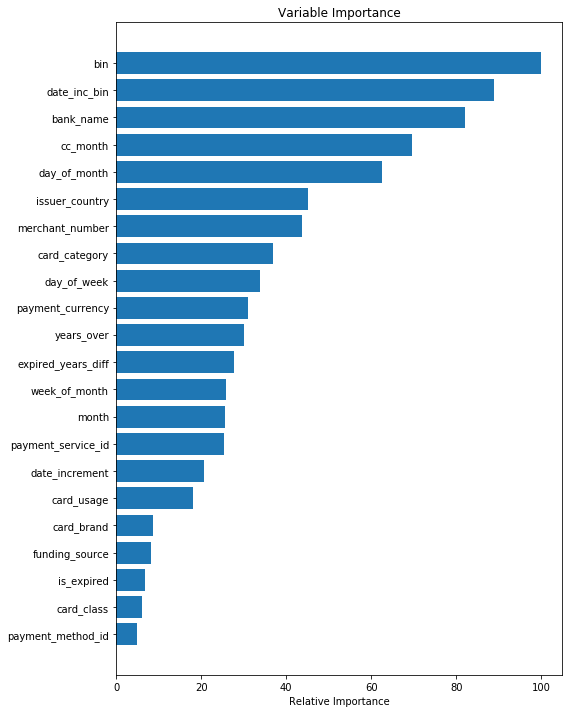

In [92]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
from src.web.preprocessing import *
from src.web.preprocessing import PreProcessing 
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [7],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1200], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}


best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.13, #so called `eta` value
              'max_depth': 10,
              'min_child_weight': 6,
              'silent': 0,
              'subsample': 0.8,
              'colsample_bytree': 0.7,
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337,
              'eval_metric': 'map',
              'gamma': 2  }

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)
features_dict['eval_metric'] = 'map'
xgb_clf, result_d = build_and_train(eco_2019, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=best_parameters, features_dict=features_dict)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


In [88]:
eco_bin_profile[eco_bin_profile['bin'] == "450910"]

,bin,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9
5647,450910,3.296703,NaN,NaN,44.4,16.666667,3.571429,3.296703,NaN,NaN,NaN,NaN,NaN,NaN,45.991561,16.666667,3.571429,15.384615,NaN,NaN,NaN


In [103]:
result_d

{'hyper_params': {'objective': 'binary:logistic',
  'learning_rate': 0.13,
  'max_depth': 10,
  'min_child_weight': 6,
  'silent': 0,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'n_estimators': 1000,
  'missing': -999,
  'seed': 1337,
  'eval_metric': 'map',
  'gamma': 2},
 'training_time': 21049.227268218994,
 'accuracy_dummy': 0.8462847514743049,
 'train_accuracy': 0.9262732081151703,
 'test_accuracy': 0.9055433866891323,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.95      0.96      0.96   1806957\n          1       0.77      0.75      0.76    329634\n\navg / total       0.93      0.93      0.93   2136591\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.94      0.95      0.94    200908\n          1       0.70      0.67      0.69     36492\n\navg / total       0.90      0.91      0.90    237400\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 

In [30]:
result_d

{'hyper_params': {'objective': 'binary:logistic',
  'learning_rate': 0.13,
  'max_depth': 10,
  'min_child_weight': 6,
  'silent': 0,
  'subsample': 0.8,
  'colsample_bytree': 0.7,
  'n_estimators': 1000,
  'missing': -999,
  'seed': 1337,
  'eval_metric': 'map',
  'gamma': 2},
 'training_time': 22798.13825082779,
 'accuracy_dummy': 0.8497943766783183,
 'train_accuracy': 0.9058936760898478,
 'test_accuracy': 0.8920484267736856,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.95   2847672\n          1       0.74      0.59      0.65    507246\n\navg / total       0.90      0.91      0.90   3354918\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94    316777\n          1       0.68      0.54      0.60     55992\n\navg / total       0.88      0.89      0.89    372769\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', '

In [28]:
result_d

{'hyper_params': {'objective': 'binary:logistic',
  'learning_rate': 0.12,
  'max_depth': 10,
  'min_child_weight': 7,
  'silent': 0,
  'subsample': 0.7,
  'colsample_bytree': 0.7,
  'n_estimators': 1000,
  'missing': -999,
  'seed': 1337,
  'eval_metric': 'map',
  'gamma': 2},
 'training_time': 22604.827487707138,
 'accuracy_dummy': 0.8497943766783183,
 'train_accuracy': 0.9039171747267742,
 'test_accuracy': 0.8913402133761122,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.94   2847672\n          1       0.73      0.58      0.64    507246\n\navg / total       0.90      0.90      0.90   3354918\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94    316777\n          1       0.68      0.53      0.59     55992\n\navg / total       0.88      0.89      0.89    372769\n',
 'feature_importance_columns': "Index(['card_class', 'payment_method_id', 

In [20]:
result_d

{'training_time': 21589.600026607513,
 'accuracy_dummy': 0.8497943766783183,
 'train_accuracy': 0.9012494493158998,
 'test_accuracy': 0.8904683597616755,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.94   2847672\n          1       0.72      0.56      0.63    507246\n\navg / total       0.89      0.90      0.90   3354918\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94    316777\n          1       0.68      0.52      0.59     55992\n\navg / total       0.88      0.89      0.88    372769\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'funding_source', 'card_brand',\n       'week_of_month', 'card_usage', 'payment_service_id',\n       'expired_years_diff', 'years_over', 'payment_currency', 'day_of_week',\n       'date_increment', 'issuer_country', 'merchant_number', 'card_category',\n       'month', 'day_of_mo

In [70]:
result_d

{'training_time': 33392.38062095642,
 'accuracy_dummy': 0.8487249754912166,
 'train_accuracy': 0.896675277866273,
 'test_accuracy': 0.8878917147064056,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94   4033848\n          1       0.70      0.55      0.62    721587\n\navg / total       0.89      0.90      0.89   4755435\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.95      0.94    448451\n          1       0.67      0.52      0.58     79931\n\navg / total       0.88      0.89      0.88    528382\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'funding_source', 'card_brand',\n       'week_of_month', 'card_usage', 'payment_service_id', 'payment_currency',\n       'day_of_week', 'merchant_number', 'date_increment', 'issuer_country',\n       'card_category', 'expired_years_diff', 'month', 'day_of_month',\n       'cc_month'

df_bin_profile is NONE
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.
self.features_all:  ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In fit, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_o

/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (4755435, 20

[06:17:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 472 extra nodes, 8 pruned nodes, max_depth=9
[06:17:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 624 extra nodes, 14 pruned nodes, max_depth=9
[06:18:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 210 extra nodes, 18 pruned nodes, max_depth=9
[06:18:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 20 pruned nodes, max_depth=9
[06:18:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 14 pruned nodes, max_depth=9
[06:19:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 598 extra nodes, 26 pruned nodes, max_depth=9
[06:19:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 740 extra nodes, 12 pruned nodes, max_depth=9
[06:19:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 20 pruned nodes, max_depth=9
[

[06:38:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 630 extra nodes, 6 pruned nodes, max_depth=9
[06:38:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 10 pruned nodes, max_depth=9
[06:39:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 16 pruned nodes, max_depth=9
[06:39:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 12 pruned nodes, max_depth=9
[06:39:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 22 pruned nodes, max_depth=9
[06:40:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 628 extra nodes, 32 pruned nodes, max_depth=9
[06:40:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 22 pruned nodes, max_depth=9
[06:40:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 4 pruned nodes, max_depth=9
[0

[06:59:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 200 extra nodes, 6 pruned nodes, max_depth=9
[06:59:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 812 extra nodes, 26 pruned nodes, max_depth=9
[06:59:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 700 extra nodes, 32 pruned nodes, max_depth=9
[07:00:17] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 18 pruned nodes, max_depth=9
[07:00:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 20 pruned nodes, max_depth=9
[07:00:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 26 pruned nodes, max_depth=9
[07:01:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 12 pruned nodes, max_depth=9
[07:01:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 14 pruned nodes, max_depth=9
[

[07:19:54] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 10 pruned nodes, max_depth=9
[07:20:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 724 extra nodes, 32 pruned nodes, max_depth=9
[07:20:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 10 pruned nodes, max_depth=9
[07:20:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 18 pruned nodes, max_depth=9
[07:21:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 736 extra nodes, 32 pruned nodes, max_depth=9
[07:21:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 16 pruned nodes, max_depth=9
[07:21:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 688 extra nodes, 38 pruned nodes, max_depth=9
[07:22:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 20 pruned nodes, max_depth=9


[07:40:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 20 pruned nodes, max_depth=9
[07:40:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 10 pruned nodes, max_depth=9
[07:41:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 14 pruned nodes, max_depth=9
[07:41:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 14 pruned nodes, max_depth=9
[07:41:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 14 pruned nodes, max_depth=9
[07:42:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 8 pruned nodes, max_depth=9
[07:42:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 418 extra nodes, 30 pruned nodes, max_depth=9
[07:42:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 248 extra nodes, 12 pruned nodes, max_depth=9
[

[08:00:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 32 pruned nodes, max_depth=9
[08:01:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 326 extra nodes, 16 pruned nodes, max_depth=9
[08:01:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 22 pruned nodes, max_depth=9
[08:01:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 340 extra nodes, 16 pruned nodes, max_depth=9
[08:02:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 22 pruned nodes, max_depth=9
[08:02:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 576 extra nodes, 22 pruned nodes, max_depth=9
[08:02:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 26 pruned nodes, max_depth=9
[08:03:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 16 pruned nodes, max_depth=9


[08:23:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 24 pruned nodes, max_depth=9
[08:23:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 22 pruned nodes, max_depth=9
[08:23:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 536 extra nodes, 20 pruned nodes, max_depth=9
[08:24:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 492 extra nodes, 14 pruned nodes, max_depth=9
[08:24:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 160 extra nodes, 8 pruned nodes, max_depth=9
[08:24:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 16 pruned nodes, max_depth=9
[08:24:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 12 pruned nodes, max_depth=9
[08:25:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 8 pruned nodes, max_depth=9
[0

[08:46:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 312 extra nodes, 18 pruned nodes, max_depth=9
[08:46:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 16 pruned nodes, max_depth=9
[08:46:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 22 pruned nodes, max_depth=9
[08:47:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 6 pruned nodes, max_depth=9
[08:47:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 32 pruned nodes, max_depth=9
[08:48:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 516 extra nodes, 22 pruned nodes, max_depth=9
[08:48:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 604 extra nodes, 20 pruned nodes, max_depth=9
[08:48:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 4 pruned nodes, max_depth=9
[0

[09:08:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 10 pruned nodes, max_depth=9
[09:08:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 24 pruned nodes, max_depth=9
[09:09:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 10 pruned nodes, max_depth=9
[09:09:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 250 extra nodes, 6 pruned nodes, max_depth=9
[09:09:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 12 pruned nodes, max_depth=9
[09:10:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 406 extra nodes, 16 pruned nodes, max_depth=9
[09:10:31] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 22 pruned nodes, max_depth=9
[09:10:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 6 pruned nodes, max_depth=9
[0

[09:30:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 12 pruned nodes, max_depth=9
[09:30:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 504 extra nodes, 32 pruned nodes, max_depth=9
[09:31:13] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 22 pruned nodes, max_depth=9
[09:31:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 656 extra nodes, 30 pruned nodes, max_depth=9
[09:31:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 22 pruned nodes, max_depth=9
[09:32:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 266 extra nodes, 14 pruned nodes, max_depth=9
[09:32:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 20 pruned nodes, max_depth=9
[09:32:55] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 18 pruned nodes, max_depth=9


[09:53:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 226 extra nodes, 20 pruned nodes, max_depth=9
[09:53:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 24 pruned nodes, max_depth=9
[09:53:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 446 extra nodes, 14 pruned nodes, max_depth=9
[09:54:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 28 pruned nodes, max_depth=9
[09:54:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 34 pruned nodes, max_depth=9
[09:54:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 408 extra nodes, 28 pruned nodes, max_depth=9
[09:55:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 640 extra nodes, 32 pruned nodes, max_depth=9
[09:55:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 22 pruned nodes, max_depth=9


[10:15:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 12 pruned nodes, max_depth=9
[10:15:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 18 pruned nodes, max_depth=9
[10:16:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 6 pruned nodes, max_depth=9
[10:16:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 338 extra nodes, 18 pruned nodes, max_depth=9
[10:16:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 330 extra nodes, 12 pruned nodes, max_depth=9
[10:17:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 334 extra nodes, 18 pruned nodes, max_depth=9
[10:17:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 14 pruned nodes, max_depth=9
[10:17:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 8 pruned nodes, max_depth=9
[1

[10:37:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 568 extra nodes, 32 pruned nodes, max_depth=9
[10:38:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 28 pruned nodes, max_depth=9
[10:38:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 16 pruned nodes, max_depth=9
[10:38:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 28 pruned nodes, max_depth=9
[10:39:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 588 extra nodes, 34 pruned nodes, max_depth=9
[10:39:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 18 pruned nodes, max_depth=9
[10:39:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 508 extra nodes, 16 pruned nodes, max_depth=9
[10:40:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 12 pruned nodes, max_depth=9


[10:59:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 514 extra nodes, 8 pruned nodes, max_depth=9
[11:00:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 696 extra nodes, 22 pruned nodes, max_depth=9
[11:00:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 292 extra nodes, 18 pruned nodes, max_depth=9
[11:00:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 486 extra nodes, 26 pruned nodes, max_depth=9
[11:01:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 374 extra nodes, 8 pruned nodes, max_depth=9
[11:01:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 362 extra nodes, 24 pruned nodes, max_depth=9
[11:01:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 16 pruned nodes, max_depth=9
[11:02:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 26 pruned nodes, max_depth=9
[1

[11:21:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 538 extra nodes, 32 pruned nodes, max_depth=9
[11:22:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 28 pruned nodes, max_depth=9
[11:22:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 428 extra nodes, 24 pruned nodes, max_depth=9
[11:22:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 394 extra nodes, 18 pruned nodes, max_depth=9
[11:23:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 646 extra nodes, 20 pruned nodes, max_depth=9
[11:23:29] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 18 pruned nodes, max_depth=9
[11:23:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 286 extra nodes, 14 pruned nodes, max_depth=9
[11:24:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 496 extra nodes, 36 pruned nodes, max_depth=9


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


best_parameters  {'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 7, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'eval_metric': 'map', 'gamma': 1}
x_train (4755435, 23)
x_test (528382, 18)
x_train  .....                 card_brand funding_source                       card_category  \
2437294              Visa          Debit                        Visa Classic   
3620924        MasterCard         Credit  MasterCard Credit Card (mixed BIN)   
4574618              Visa          Debit                        Visa Classic   
1055588  American Express  No Data found         No Data Found', value: 'N/A   
1901860              Visa          Debit                        Visa Classic   

            card_class                                          card_usage  \
2437294       Consumer                    Debit Hybrid (PIN and Signature)   
3620924       Consumer           True credit (No P

/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (528382, 20)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# training time: 36957.876111745834
x_train:                card_brand funding_source                       card_category  \
2437294              Visa          Debit                        Visa Classic   
3620924        MasterCard         Credit  MasterCard Credit Card (mixed BIN)   
4574618              Visa          Debit                        Visa Classic   
1055588  American Express  No Data found         No Data Found', value: 'N/A   
1901860              Visa          Debit                        Visa Classic   

            card_class                                          card_usage  \
2437294       Consumer                    Debit Hybrid (PIN and Signature)   
3620924       Consumer           True credit (No PIN/Signature capability)   
4574618       Consumer            Debit - Debit Hybrid (PIN and Signature)   
1055588  No Data found  Credit - True credit (No PIN/Signature capability)   
1901860       Consumer                    Debit Hybrid (PIN and Signature)   

     

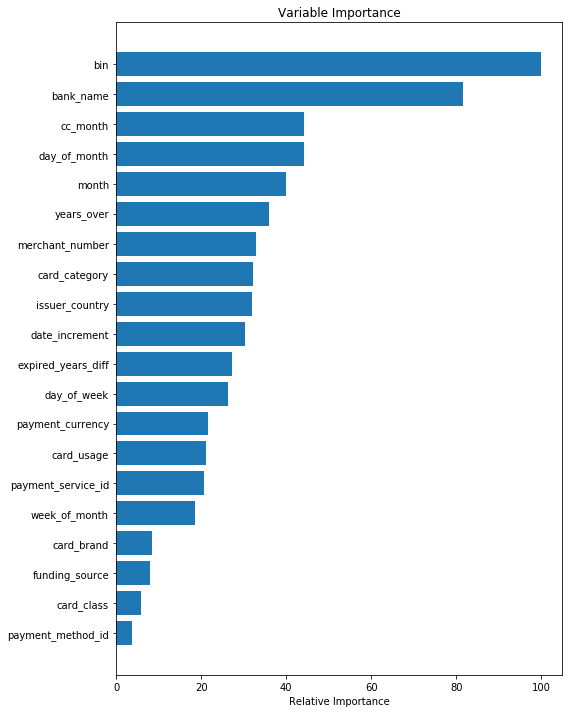

In [447]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
from src.web.preprocessing import *
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [7],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1200], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}


best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.15, #so called `eta` value
              'max_depth': 9,
              'min_child_weight': 7,
              'silent': 0,
              'subsample': 0.7,
              'colsample_bytree': 0.7,
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337,
              'eval_metric': 'map',
              'gamma': 1  }

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)
features_dict['eval_metric'] = 'map'
xgb_clf, result_d = build_and_train(eco, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=best_parameters, features_dict=features_dict)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


df_bin_profile is NONE
Best Retry preprocessing pipeline ... 
training xgb ....... 
In EnhancedPipeline fit_predict ...
self.features_encoded: ['week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']


/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.
self.features_all:  ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In fit, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
fit df[self.features_cat_and_encoded] size: (4755435, 18)
fit y size: 4

/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (4755435, 18)
# transform_time: 12804.506194353104
[13:48:49] Tree method is automatically sel

[14:03:46] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 668 extra nodes, 18 pruned nodes, max_depth=9
[14:04:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 14 pruned nodes, max_depth=9
[14:04:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 392 extra nodes, 22 pruned nodes, max_depth=9
[14:04:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 16 pruned nodes, max_depth=9
[14:04:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 650 extra nodes, 18 pruned nodes, max_depth=9
[14:05:10] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 434 extra nodes, 40 pruned nodes, max_depth=9
[14:05:28] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 580 extra nodes, 6 pruned nodes, max_depth=9
[14:05:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 12 pruned nodes, max_depth=9
[

[14:20:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 370 extra nodes, 10 pruned nodes, max_depth=9
[14:21:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 518 extra nodes, 16 pruned nodes, max_depth=9
[14:21:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 14 pruned nodes, max_depth=9
[14:21:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 18 pruned nodes, max_depth=9
[14:21:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 10 pruned nodes, max_depth=9
[14:22:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 534 extra nodes, 32 pruned nodes, max_depth=9
[14:22:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 10 pruned nodes, max_depth=9
[14:22:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 600 extra nodes, 20 pruned nodes, max_depth=9


[14:38:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 368 extra nodes, 16 pruned nodes, max_depth=9
[14:39:08] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 458 extra nodes, 18 pruned nodes, max_depth=9
[14:39:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 12 pruned nodes, max_depth=9
[14:39:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 706 extra nodes, 22 pruned nodes, max_depth=9
[14:39:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes, 22 pruned nodes, max_depth=9
[14:40:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 758 extra nodes, 12 pruned nodes, max_depth=9
[14:40:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 26 pruned nodes, max_depth=9
[14:40:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 532 extra nodes, 28 pruned nodes, max_depth=9


[14:55:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 6 pruned nodes, max_depth=9
[14:55:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 18 pruned nodes, max_depth=9
[14:55:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 20 pruned nodes, max_depth=9
[14:56:07] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 18 pruned nodes, max_depth=9
[14:56:22] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 526 extra nodes, 18 pruned nodes, max_depth=9
[14:56:37] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 596 extra nodes, 24 pruned nodes, max_depth=9
[14:56:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 478 extra nodes, 8 pruned nodes, max_depth=9
[14:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 366 extra nodes, 22 pruned nodes, max_depth=9
[1

[15:11:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 12 pruned nodes, max_depth=9
[15:12:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 586 extra nodes, 14 pruned nodes, max_depth=9
[15:12:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 20 pruned nodes, max_depth=9
[15:12:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 268 extra nodes, 12 pruned nodes, max_depth=9
[15:12:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 454 extra nodes, 14 pruned nodes, max_depth=9
[15:13:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 6 pruned nodes, max_depth=9
[15:13:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes, 36 pruned nodes, max_depth=9
[15:13:40] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 416 extra nodes, 24 pruned nodes, max_depth=9
[

[15:28:39] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 12 pruned nodes, max_depth=9
[15:28:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 12 pruned nodes, max_depth=9
[15:29:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 352 extra nodes, 6 pruned nodes, max_depth=9
[15:29:25] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 500 extra nodes, 26 pruned nodes, max_depth=9
[15:29:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 590 extra nodes, 18 pruned nodes, max_depth=9
[15:29:56] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 498 extra nodes, 18 pruned nodes, max_depth=9
[15:30:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 310 extra nodes, 24 pruned nodes, max_depth=9
[15:30:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 8 pruned nodes, max_depth=9
[1

[15:45:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 284 extra nodes, 26 pruned nodes, max_depth=9
[15:45:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 564 extra nodes, 14 pruned nodes, max_depth=9
[15:45:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 10 pruned nodes, max_depth=9
[15:46:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 8 pruned nodes, max_depth=9
[15:46:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 388 extra nodes, 16 pruned nodes, max_depth=9
[15:46:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 4 pruned nodes, max_depth=9
[15:46:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 270 extra nodes, 20 pruned nodes, max_depth=9
[15:47:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 556 extra nodes, 26 pruned nodes, max_depth=9
[1

[16:02:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 534 extra nodes, 28 pruned nodes, max_depth=9
[16:02:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 442 extra nodes, 18 pruned nodes, max_depth=9
[16:02:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 652 extra nodes, 20 pruned nodes, max_depth=9
[16:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 336 extra nodes, 18 pruned nodes, max_depth=9
[16:03:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 20 pruned nodes, max_depth=9
[16:03:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 306 extra nodes, 20 pruned nodes, max_depth=9
[16:03:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 384 extra nodes, 24 pruned nodes, max_depth=9
[16:03:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 22 pruned nodes, max_depth=9


[16:18:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 274 extra nodes, 12 pruned nodes, max_depth=9
[16:19:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 10 pruned nodes, max_depth=9
[16:19:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 332 extra nodes, 14 pruned nodes, max_depth=9
[16:19:33] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 278 extra nodes, 16 pruned nodes, max_depth=9
[16:19:48] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 578 extra nodes, 22 pruned nodes, max_depth=9
[16:20:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 20 pruned nodes, max_depth=9
[16:20:21] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 502 extra nodes, 22 pruned nodes, max_depth=9
[16:20:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 6 pruned nodes, max_depth=9
[

[16:35:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 18 pruned nodes, max_depth=9
[16:35:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 8 pruned nodes, max_depth=9
[16:35:59] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 450 extra nodes, 24 pruned nodes, max_depth=9
[16:36:14] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 484 extra nodes, 12 pruned nodes, max_depth=9
[16:36:30] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 280 extra nodes, 6 pruned nodes, max_depth=9
[16:36:47] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 380 extra nodes, 10 pruned nodes, max_depth=9
[16:37:02] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 2 pruned nodes, max_depth=9
[16:37:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 2 pruned nodes, max_depth=9
[16:

[16:52:05] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 22 pruned nodes, max_depth=9
[16:52:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 620 extra nodes, 14 pruned nodes, max_depth=9
[16:52:36] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 320 extra nodes, 18 pruned nodes, max_depth=9
[16:52:50] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 708 extra nodes, 34 pruned nodes, max_depth=9
[16:53:04] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 14 pruned nodes, max_depth=9
[16:53:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 304 extra nodes, 10 pruned nodes, max_depth=9
[16:53:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 8 pruned nodes, max_depth=9
[16:53:53] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 460 extra nodes, 28 pruned nodes, max_depth=9
[

[17:08:24] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 18 pruned nodes, max_depth=9
[17:08:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 18 pruned nodes, max_depth=9
[17:08:57] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 760 extra nodes, 18 pruned nodes, max_depth=9
[17:09:11] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 12 pruned nodes, max_depth=9
[17:09:26] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 12 pruned nodes, max_depth=9
[17:09:43] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 488 extra nodes, 14 pruned nodes, max_depth=9
[17:10:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 480 extra nodes, 26 pruned nodes, max_depth=9
[17:10:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 482 extra nodes, 22 pruned nodes, max_depth=9


[17:25:18] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 344 extra nodes, 16 pruned nodes, max_depth=9
[17:25:34] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 424 extra nodes, 10 pruned nodes, max_depth=9
[17:25:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 8 pruned nodes, max_depth=9
[17:26:03] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 208 extra nodes, 8 pruned nodes, max_depth=9
[17:26:20] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 282 extra nodes, 28 pruned nodes, max_depth=9
[17:26:35] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 358 extra nodes, 16 pruned nodes, max_depth=9
[17:26:52] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 28 pruned nodes, max_depth=9
[17:27:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 8 pruned nodes, max_depth=9
[17

[17:42:23] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 462 extra nodes, 8 pruned nodes, max_depth=9
[17:42:41] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 432 extra nodes, 26 pruned nodes, max_depth=9
[17:43:00] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 264 extra nodes, 8 pruned nodes, max_depth=9
[17:43:16] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 328 extra nodes, 10 pruned nodes, max_depth=9
[17:43:32] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 296 extra nodes, 22 pruned nodes, max_depth=9
[17:43:49] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 318 extra nodes, 16 pruned nodes, max_depth=9
[17:44:06] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 8 pruned nodes, max_depth=9
[17:44:19] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 634 extra nodes, 32 pruned nodes, max_depth=9
[17

[18:01:12] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 430 extra nodes, 14 pruned nodes, max_depth=9
[18:01:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 398 extra nodes, 18 pruned nodes, max_depth=9
[18:01:42] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 574 extra nodes, 28 pruned nodes, max_depth=9
[18:01:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 422 extra nodes, 26 pruned nodes, max_depth=9
[18:02:15] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 360 extra nodes, 22 pruned nodes, max_depth=9
[18:02:27] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 490 extra nodes, 56 pruned nodes, max_depth=9
[18:02:44] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 356 extra nodes, 22 pruned nodes, max_depth=9
[18:02:58] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 254 extra nodes, 20 pruned nodes, max_depth=9


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


best_parameters  {'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 7, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'eval_metric': 'map', 'gamma': 1}
x_train (4755435, 21)
x_test (528382, 16)
x_train  .....                 card_brand funding_source                       card_category  \
2437294              Visa          Debit                        Visa Classic   
3620924        MasterCard         Credit  MasterCard Credit Card (mixed BIN)   
4574618              Visa          Debit                        Visa Classic   
1055588  American Express  No Data found         No Data Found', value: 'N/A   
1901860              Visa          Debit                        Visa Classic   

            card_class                                          card_usage  \
2437294       Consumer                    Debit Hybrid (PIN and Signature)   
3620924       Consumer           True credit (No P

/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (528382, 18)
# transform_time: 1188.335953950882


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# training time: 31849.092401981354
x_train:                card_brand funding_source                       card_category  \
2437294              Visa          Debit                        Visa Classic   
3620924        MasterCard         Credit  MasterCard Credit Card (mixed BIN)   
4574618              Visa          Debit                        Visa Classic   
1055588  American Express  No Data found         No Data Found', value: 'N/A   
1901860              Visa          Debit                        Visa Classic   

            card_class                                          card_usage  \
2437294       Consumer                    Debit Hybrid (PIN and Signature)   
3620924       Consumer           True credit (No PIN/Signature capability)   
4574618       Consumer            Debit - Debit Hybrid (PIN and Signature)   
1055588  No Data found  Credit - True credit (No PIN/Signature capability)   
1901860       Consumer                    Debit Hybrid (PIN and Signature)   

     

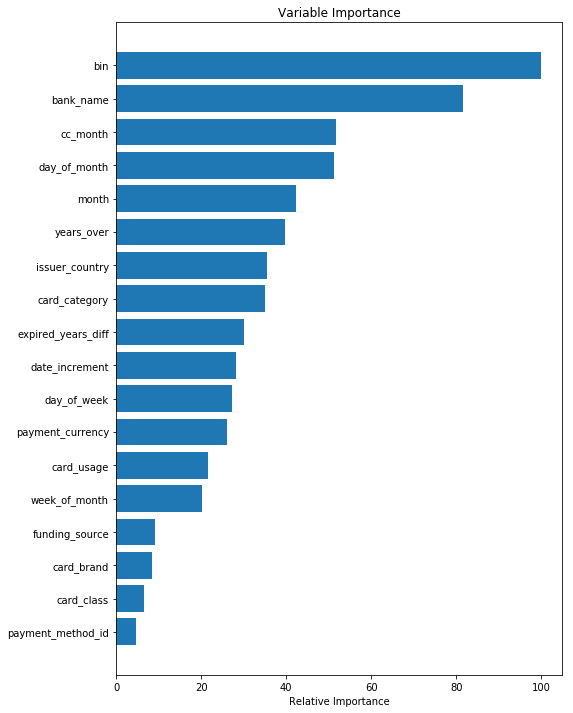

In [444]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
from src.web.preprocessing import *
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.1], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [7],
              'silent': [0],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1200], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step':[1],  
              'seed': [1337]}


best_parameters = {
              'objective': 'binary:logistic',
              'learning_rate': 0.15, #so called `eta` value
              'max_depth': 9,
              'min_child_weight': 7,
              'silent': 0,
              'subsample': 0.7,
              'colsample_bytree': 0.7,
              'n_estimators': 1000, #number of trees, change it to 1000 for better results  
              'missing':-999,
              'seed': 1337,
              'eval_metric': 'map',
              'gamma': 1  }

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id, MODEL_TYPE) + 1
model_name = model_id + '.' + str(version)
features_dict['eval_metric'] = 'map'
xgb_clf, result_d = build_and_train(eco, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=best_parameters, features_dict=features_dict)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


In [385]:
result_d

{'training_time': 32719.829132556915,
 'accuracy_dummy': 0.8487249754912166,
 'train_accuracy': 0.9058704408744941,
 'test_accuracy': 0.8970933907665287,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.95   4033848\n          1       0.74      0.59      0.66    721587\n\navg / total       0.90      0.91      0.90   4755435\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94    448451\n          1       0.70      0.56      0.62     79931\n\navg / total       0.89      0.90      0.89    528382\n',
 'feature_importance_columns': "Index(['week_of_month', 'payment_currency', 'payment_service_id', 'card_usage',\n       'day_of_week', 'expired_years_diff', 'date_increment',\n       'merchant_descriptor', 'merchant_number', 'issuer_country',\n       'years_over', 'month', 'card_category', 'day_of_month', 'cc_month',\n       'bank_name', 'bin'],\n    

In [361]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 7, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'gamma': 1}",
 'training_time': 31801.1110291481,
 'accuracy_dummy': 0.8485224704853686,
 'train_accuracy': 0.9068716818770033,
 'test_accuracy': 0.8975526544558041,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.95   3809783\n          1       0.74      0.60      0.66    681461\n\navg / total       0.90      0.91      0.90   4491244\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.96      0.94    672516\n          1       0.70      0.56      0.63    120057\n\navg / total       0.89      0.90      0.89    792573\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'funding_source', 'card_brand',\n       'week

In [249]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 7, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'gamma': 1}",
 'training_time': 6671.4853048324585,
 'accuracy_dummy': 0.8597501434070001,
 'train_accuracy': 0.9356516054450366,
 'test_accuracy': 0.9136580388928541,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96   1113167\n          1       0.81      0.71      0.76    180929\n\navg / total       0.93      0.94      0.93   1294096\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.94      0.96      0.95    196342\n          1       0.72      0.62      0.67     32029\n\navg / total       0.91      0.91      0.91    228371\n',
 'feature_importance_columns': "Index(['bank_code', 'mid_entity_code', 'card_class', 'payment_method_id',\n       'ca

In [242]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 9, 'min_child_weight': 7, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'gamma': 1}",
 'training_time': 7821.536792039871,
 'accuracy_dummy': 0.8597501434070001,
 'train_accuracy': 0.9328743771714,
 'test_accuracy': 0.9090558783733487,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96   1113167\n          1       0.79      0.71      0.75    180929\n\navg / total       0.93      0.93      0.93   1294096\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.94      0.96      0.95    196342\n          1       0.70      0.62      0.66     32029\n\navg / total       0.91      0.91      0.91    228371\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'card_brand', 'funding_source',\n       'month'

In [219]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 8, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1200, 'missing': -999, 'seed': 1337, 'gamma': 1}",
 'training_time': 6367.073647022247,
 'accuracy_dummy': 0.8597501434070001,
 'train_accuracy': 0.9218651475624683,
 'test_accuracy': 0.9056841718081543,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.95      0.96      0.95   1113167\n          1       0.75      0.67      0.70    180929\n\navg / total       0.92      0.92      0.92   1294096\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.94      0.95      0.95    196342\n          1       0.69      0.60      0.64     32029\n\navg / total       0.90      0.91      0.90    228371\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'funding_source', 'card_brand',\n       'mon

In [193]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 10, 'min_child_weight': 8, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1200, 'missing': -999, 'seed': 1337, 'gamma': 2}",
 'training_time': 7473.279663801193,
 'accuracy_dummy': 0.8597501434070001,
 'train_accuracy': 0.9361577502750955,
 'test_accuracy': 0.906721956815883,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.96      0.97      0.96   1113167\n          1       0.80      0.73      0.76    180929\n\navg / total       0.93      0.94      0.94   1294096\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.94      0.95      0.95    196342\n          1       0.69      0.62      0.65     32029\n\navg / total       0.90      0.91      0.90    228371\n',
 'feature_importance_columns': "Index(['bank_code', 'payment_method_id', 'card_class', 'card_brand',\n       'funding_

In [114]:
result_d

{'hyper_params': "{'objective': 'binary:logistic', 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 8, 'silent': 0, 'subsample': 0.7, 'colsample_bytree': 0.7, 'n_estimators': 1000, 'missing': -999, 'seed': 1337, 'gamma': 1}",
 'training_time': 5059.331326007843,
 'accuracy_dummy': 0.8597501434070001,
 'train_accuracy': 0.9004934718908025,
 'test_accuracy': 0.8898721816693013,
 'train_class_report': '             precision    recall  f1-score   support\n\n          0       0.92      0.97      0.94   1113167\n          1       0.72      0.48      0.57    180929\n\navg / total       0.89      0.90      0.89   1294096\n',
 'test_class_report': '             precision    recall  f1-score   support\n\n          0       0.91      0.96      0.94    196342\n          1       0.66      0.44      0.53     32029\n\navg / total       0.88      0.89      0.88    228371\n',
 'feature_importance_columns': "Index(['payment_method_id', 'card_class', 'funding_source', 'card_brand',\n       'ban

In [16]:
model_file_name

'/var/spark/ml_files/models/ML-ECO-1.14.pkl'

In [18]:
# def insert_model_info(model_id, version, file_name, desc, model_type=MODEL_TYPE, algorithm='XGBClassifier', hyper_parameter=None, eval_metrics=None, extended_att=None):
    
#     print("hyper_parameter: {}".format(hyper_parameter))
#     """Inserts model info into Cassandra table"""
#     if not extended_att:
#         extended_att= "{}"
    
#     mlp_session.execute(
#     """
#     INSERT INTO ml_model_storage (model_type, model_id, version, features_cat, features_encoded, features_num, repo_path, description, creation_date, modification_date, algorithm, hyper_parameter, eval_metrics, extended_attributes)
#     VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
#     """,
#     (model_type, model_id, version, json.dumps(FEATURES_CAT), json.dumps(FEATURES_ENCODED), json.dumps(FEATURES_NUM), file_name, desc, datetime.datetime.utcnow(), datetime.datetime.utcnow(), algorithm, hyper_parameter, eval_metrics, extended_att)
        
#     )
#     print("Model %s version %d is inserted into model repo" % (model_id, version))      

In [33]:
"""Upload model to Nexus repo and insert the model info into Cassandra table"""
import json

start_date = '2018-01-01'
# start_date = '2019-01-01'

end_date = '2019-03-31'

try:
    repo_path = upload_artifact(model_file_name)
    preprocess_repo_path = handle_preprocessing_file(model_id, version)
    size_desc = str(", original size: %s (fail: %s, success: %s), balanced_size: %s" % (original_size, fail_size, success_size, original_size))
    desc = '{}_{}_for_eco model with years_over calculated in preprocessing. {}'.format(start_date, end_date, size_desc)
    hyper_params = result_d.pop('hyper_params', None)
    extended_att = {"preprocess_repo_path": preprocess_repo_path, "input_features": INPUT_FEATURES}
    insert_model_info(model_id, version, repo_path, desc=desc, model_type=MODEL_TYPE,eval_metrics=json.dumps(result_d), 
                      hyper_parameter=json.dumps(hyper_params), extended_att=json.dumps(extended_att), features_dict=features_dict)
    
except:
    if not hyper_params:
        result_d['hyper_params'] = hyper_params 

http://nexus.digitalriverws.net/nexus/content/repositories/foundationreleases/com/digitalriver/prediction-service/ML-ECO/1.35/ML-ECO-1.35.pkl
[com.digitalriver.prediction-service:ML-ECO:1.35::pkl]
http://nexus.digitalriverws.net/nexus/content/repositories/foundationreleases/com/digitalriver/prediction-service/ML-ECO/1_35_preprocessing/ML-ECO-1_35_preprocessing.py
[com.digitalriver.prediction-service:ML-ECO:1_35_preprocessing::py]
Model ML-ECO-1 version 35 is inserted into model repo


The following files were uploaded to repository foundationreleases
The following files were uploaded to repository foundationreleases


In [72]:
eco_2019_04 = pd.read_csv(WORK_DIR + 'eco_2019_04.csv')
eco_2019_04.shape

/opt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,15,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2859291, 48)

In [81]:
eco_2019_04 = eco_2019_04[eco_2019_04['added_expiry_years'] != '']
eco_2019_04.shape

(440406, 50)

In [84]:
y_pred_test = xgb_clf.predict(eco_2019_04)
y_pred_test

Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'cc_month', 'week_of_month', 'day_of_week', 'month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'cc_month', 'week_of_month', 'day_of_week', 'month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (440406, 20)
# t

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 0, 0, ..., 0, 0, 0])

In [78]:
eco_2019[(eco_2019['bank_code'] == 'F9EA1BCBF1F961C7') & (eco_2019['bank_code'] == 'F9EA1BCBF1F961C7')]['card_brand'].value_counts()

American Express    1415
Visa                  44
MasterCard            14
Name: card_brand, dtype: int64

In [92]:
# eco_2019[eco_2019['bin'] == 465858.0]['bank_name'].value_counts(dropna=False)
# eco_2019[(eco_2019['bin'].isna()) & (eco_2019['success'] == 1)]
eco_2019[(eco_2019['payment_service_id'].isna())]['success'].value_counts()

Series([], Name: success, dtype: int64)

In [118]:
eco_2019.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff
0,0,0,0,0,2019-02-15,acd,2462462809,8297439003,2019-02-15 06:17:16,0,NON3DS,UBS Switzerland AG,LI,454713.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,NaN,0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,Credit,CH,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,netgiro-bms,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[05] [] [111800] [111800],New,15251946800,2019-02-15 00:17:16,0,Authorize,0,12,True,0,60.433945,59.000000,2.68,488.960000,36.392530,110.044830,158.540509,24.626213,43.543945,42.110000,141.650509,-7.151415
1,1,1,1,1,2019-02-15,acd,2462462809,8297439053,2019-02-15 06:17:17,0,NON3DS,UBS Switzerland AG,LI,454713.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,RETRY_DECLINED.2,0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,Credit,CH,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,14.99,16.89,EUR,Visa,drwp-fd,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[null] [null] [null] [null],New,15251946800,2019-02-15 00:17:17,0,Authorize,0,12,True,0,60.433945,59.000000,2.68,488.960000,36.392530,110.044830,158.540509,24.626213,43.543945,42.110000,141.650509,-7.151415
2,2,2,2,2,2019-02-15,acd,2463604509,8297439033,2019-02-15 06:17:16,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,NaN,3,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,Credit,KR,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-bms,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],New,15252060500,2019-02-15 00:17:16,0,Authorize,0,1,False,3,21.088691,16.500000,6.99,670.127693,19.128329,53.101640,55.919678,9.778057,2.398691,-2.190000,37.229678,16.729637
3,3,3,3,3,2019-02-15,acd,2463604509,8297439063,2019-02-15 06:17:18,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),0122,RETRY_DECLINED.2,3,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,Credit,KR,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,18.69,18.69,USD,Visa,netgiro-seb,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],New,15252060500,2019-02-15 00:17:18,0,Authorize,0,1,False,3,21.088691,16.500000,6.99,670.127693,19.128329,53.101640,55.919678,9.778057,2.398691,-2.190000,37.229678,16.729637
4,4,4,4,4,2019-02-15,acd,2489810409,8297458043,2019-02-15 06:21:02,0,NON3DS,BAWAG P.S.K. BANK,AT,526624.0,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),0716,NaN,0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,Credit,AT,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,14.99,16.89,EUR,MasterCard,netgiro-bms,1,14.99,16.89,EUR,57992331400,0.0,SUCCESS[00] [526463] [111800] [111800],New,15383570200,2019-02-15 00:21:02,0,Authorize,1,7,True,0,53.852172,51.833908,2.99,458.470000,25.066976,96.428067,125.702347,24.747377,36.962172,34.943

In [16]:
def to_date_cc_expire_date(datestr):
    datestr = str(datestr).replace('/','')
    struct = time.strptime(datestr, "%m%y")
    last_date = monthrange(struct.tm_year,struct.tm_mon)[1]
    date = datetime.date(struct.tm_year,struct.tm_mon, last_date)
    return date


def original_cc_expiration_date(row):
    try:
        datestr = row['cc_expiration_date']
        datestr = str(datestr).replace('/','')
        struct = time.strptime(datestr, "%m%y")
        last_date = monthrange(struct.tm_year,struct.tm_mon)[1]
        cc_date = datetime.date(struct.tm_year,struct.tm_mon, last_date)

        try:
            added_years = int(row['added_expiry_years'])
        except:
            added_years = 0

        original_year = struct.tm_year - added_years - 2000
        return "{:0>2d}{:0>2d}".format(struct.tm_mon, original_year)
    
    except:
        return row['cc_expiration_date']

# eco_2019['original_cc_expiration_date'] = eco_2019.apply(original_cc_expiration_date, axis=1)

In [150]:
# eco_2019['cc_expiration_date'] = eco_2019['original_cc_expiration_date']

In [110]:
def expired_years_diff(row):
    datestr = row['cc_expiration_date']
    datestr = str(datestr).replace('/','')
    struct = time.strptime(datestr, "%m%y")
    original_year = struct.tm_year
    txn_year = time.strptime(row['transaction_date_in_string'], '%Y-%m-%d %H:%M:%S').tm_year
    return abs(txn_year - original_year)
    
# eco_2019['expired_years_diff'] = eco_2019.apply(expired_years_diff, axis=1) 
eco_2019_06['expired_years_diff'] = eco_2019_06.apply(expired_years_diff, axis=1) 

In [112]:
eco_2019_06 = eco_2019_06[eco_2019_06['added_expiry_years'] != 'ADD_YEARS']

In [113]:
eco_2019_06['years_over'] = eco_2019_06['added_expiry_years'].astype(int) - eco_2019_06['expired_years_diff'] 

In [111]:
eco_2019['years_over'] = eco_2019['added_expiry_years'].astype(int) - eco_2019['expired_years_diff'] 

ValueError: invalid literal for int() with base 10: 'ADD_YEARS'

In [493]:
eco['updated_cc_expiration_date'] = eco['cc_expiration_date'] 
eco['cc_expiration_date'] = eco['original_cc_expiration_date'] 

In [17]:
eco['updated_cc_expiration_date'] = eco['cc_expiration_date'] 
eco['original_cc_expiration_date'] = eco.apply(original_cc_expiration_date, axis=1)
eco['cc_expiration_date'] = eco['original_cc_expiration_date'] 
eco['date_increment'].fillna(eco['added_expiry_years'], inplace=True)

In [523]:
# eco_2019_06['original_cc_expiration_date'] = eco_2019_06.apply(original_cc_expiration_date, axis=1)

# eco_2019_06['updated_cc_expiration_date'] = eco_2019_06['cc_expiration_date'] 
eco_2019_06['cc_expiration_date'] = eco_2019_06['original_cc_expiration_date'] 

In [107]:
eco_2019_06 = eco_2019_06[~(eco_2019_06['cc_expiration_date'].isna())]

In [526]:
eco_2019_06['date_increment'].fillna(eco_2019_06['added_expiry_years'], inplace=True)

In [19]:
eco[eco['added_expiry_years'] > 2]

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,decline_type,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over,updated_cc_expiration_date
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.990000,9.778057,19.128329,2,2,2,2,2.0,3.0,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1.0,NaN,3.0,15,friday,NaN,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119,18.69,18.690000,USD,Visa,netgiro-bms,2019-02-15,3.0,18.69,18.690000,USD,57991656200,22053,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize,3,119
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.990000,9.778057,19.128329,3,3,3,3,3.0,3.0,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904.0,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1.0,RETRY_DECLINED.2,3.0,15,friday,NaN,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119,18.69,18.690000,USD,Visa,netgiro-seb,2019-02-15,3.0,18.69,18.690000,USD,57991656200,27001,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,1.525206e+10,0,2019-02-15 06:17:18,2019-02-15 00:17:18,0,8297439063,Authorize,3,119
9,173.830000,107.950000,158.214000,47.741248,49.990000,2.490000,2.490000,36.841875,9,9,9,9,9.0,4.0,4,50F541D724D6D1D5,NaN,US,377294.0,American Express,"No Data Found', value: 'N/A",No Data found,Credit - True credit (No PIN/Signature capability),718,7.0,NaN,4.0,15,friday,NaN,fe9070ca-8e4e-4dd4-9580-6c352027e2c8,1.52531e+06,1,No Data found,False,US,136.704000,26.231248,28.480000,DRI*ACD Systems,941000108071_00000001,DR_INC-ENTITY,Declined,DR_INC-ENTITY,718,21.51,21.510000,USD,AmericanExpress,mes,2019-02-15,1.0,21.51,21.510000,USD,57992331700,530,005: Do not honor,acd,New,10.610627,2491190809,1.538358e+10,0,2019-02-15 06:21:03,2019-02-15 00:21:03,0,8297458083,Authorize,3,718
10,173.830000,107.950000,158.214000,47.741248,49.990000,2.490000,2.490000,36.841875,10,10,10,10,10.0,4.0,4,50F541D724D6D1D5,NaN,US,377294.0,American Express,"No Data Found', value: 'N/A",No Data found,Credit - True credit (No PIN/Signature capability),718,7.0,RETRY_DECLINED.2,4.0,15,friday,NaN,5fb6c460-d17f-46ac-a0f0-45e097c40d83,1.52531e+06,1,No Data found,False,US,136.704000,26.231248,28.480000,DRI*ACD Systems,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,718,21.51,21.510000,USD,AmericanExpress,firstdata,2019-02-15,1.0,21.51,21.510000,USD,57992331700,530,51: DECLINED,acd,New,10.610627,2491190809,1.538358e+10,0,2019-02-15 06:21:04,2019-02-15 00:21:04,0,8297458143,Authorize,3,718
11,140.312898,97.918559,123.546916,61.233008,59.729033,4.556580,39.998065,21.067484,11,11,11,11,11.0,4.0,4,RB,BPCE,FR,497598.0,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,1015,10.0,NaN,2.0,15,friday,NaN,9be4a3b6-876e-47fe-a16d-4ed6d2f3fab9,1.82828e+06,4,Debit,False,FR,106.656916,44.343008,42.839033,DRI*A

In [236]:
eco_2019[eco_2019['subsegment_id'] == 18479833900].sort_values(by='transaction_date')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff,original_cc_expiration_date,expired_years_diff,years_over
419115,419115,419115,419115,419115,2019-02-08,adbehap,12716001101,8257974453,2019-02-08 07:24:47,3,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1218,NaN,3,8,friday,75b20383-7683-4715-9518-bfdcc8b71590,1.67213e+06,Debit,US,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.0,4.7,ARS,Visa,netgiro-seb,1,178.0,4.7,ARS,57704006400,27001.0,Transaction refused[04] [000000] [] [],New,18479833900,2019-02-08 01:24:47,1,Authorize,0,12,False,3,42.521668,33.704453,5.34,179.88,33.898974,84.99,179.88,10.27299,37.821668,29.004453,175.18,-3.922694,1218,1,2
419116,419116,419116,419116,419116,2019-02-08,adbehap,12716001101,8257974633,2019-02-08 07:24:48,3,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1218,RETRY_DECLINED.2,3,8,friday,f6cc19ea-13dc-4d18-a9b5-fb3ce3c85a76,1.67213e+06,Debit,US,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.0,4.7,ARS,Visa,netgiro-bms,1,178.0,4.7,ARS,57704006400,27050.0,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,18479833900,2019-02-08 01:24:48,1,Authorize,0,12,False,3,42.521668,33.704453,5.34,179.88,33.898974,84.99,179.88,10.27299,37.821668,29.004453,175.18,-3.922694,1218,1,2
473,473,473,473,473,2019-02-15,adbehap,12716001101,8298078583,2019-02-15 07:18:25,2,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1218,NaN,3,15,friday,0dcdbc90-a423-4164-8000-fcd03d3af739,1.67213e+06,Debit,US,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.0,4.6,ARS,Visa,netgiro-seb,2,178.0,4.6,ARS,57999811700,27001.0,Transaction refused[04] [000000] [] [],New,18479833900,2019-02-15 01:18:25,1,Authorize,0,12,False,2,42.521668,33.704453,5.34,179.88,33.898974,84.99,179.88,10.27299,37.921668,29.104453,175.28,-4.022694,1218,1,1
474,474,474,474,474,2019-02-15,adbehap,12716001101,8298078783,2019-02-15 07:18:26,2,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1218,RETRY_DECLINED.2,3,15,friday,22bf4efe-f673-4f51-8d48-2b057204a299,1.67213e+06,Debit,US,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.0,4.6,ARS,Visa,netgiro-bms,2,178.0,4.6,ARS,57999811700,27050.0,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,18479833900,2019-02-15 01:18:26,1,Authorize,0,12,False,2,42.521668,33.704453,5.34,179.88,33.898974,84.99,179.88,10.27299,37.921668,29.104453,175.28,-4.022694,1218,1,1
941293,941293,941293,941293,941293,2019-03-01,adbehap,12716001101,8386761533,2019-03-01 18:21:41,3,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1218,NaN,3,1,friday,98ca3da1-d641-42fd-86a2-5861dbad7766,1.67213e+06,Debit,US,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.0,4.7,ARS,Visa,netgiro-seb,4,178.0,4.7,ARS,58652940900,27001.0,Transaction refused[04] [000000] [] [],New,18479833900,2019-03-01 12:21:41,12,Authorize,0,12,False,3,42.521668,33.7044

In [147]:
eco_2019[eco_2019['added_expiry_years'] == 2]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff,original_cc_expiration_date,expired_years_diff
473,473,473,473,473,2019-02-15,adbehap,12716001101,8298078583,2019-02-15 07:18:25,2,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1220,NaN,3,15,friday,0dcdbc90-a423-4164-8000-fcd03d3af739,1.67213e+06,Debit,US,DRI*Adobe Sales,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.00,4.60,ARS,Visa,netgiro-seb,2,178.00,4.60,ARS,57999811700,27001.0,Transaction refused[04] [000000] [] [],New,18479833900,2019-02-15 01:18:25,1,Authorize,0,12,False,2,42.521668,33.704453,5.340000,179.880000,33.898974,84.990000,179.880000,10.272990,37.921668,29.104453,175.280000,-4.022694,1218,1
474,474,474,474,474,2019-02-15,adbehap,12716001101,8298078783,2019-02-15 07:18:26,2,NON3DS,UBS Bank USA,AR,419749.0,Visa,Visa Classic,Consumer,Debit - Debit Hybrid (PIN and Signature),1220,RETRY_DECLINED.2,3,15,friday,22bf4efe-f673-4f51-8d48-2b057204a299,1.67213e+06,Debit,US,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,178.00,4.60,ARS,Visa,netgiro-bms,2,178.00,4.60,ARS,57999811700,27050.0,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,18479833900,2019-02-15 01:18:26,1,Authorize,0,12,False,2,42.521668,33.704453,5.340000,179.880000,33.898974,84.990000,179.880000,10.272990,37.921668,29.104453,175.280000,-4.022694,1218,1
608,608,608,608,608,2019-02-15,adbehap,3354025909,8297466253,2019-02-15 06:23:21,2,NON3DS,The Hongkong and Shanghai Banking Corporation Limited,HK,492111.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1220,NaN,2,15,friday,ae63fb49-f83c-4e79-9fe2-d9f75da4751f,2.09993e+06,Credit,HK,DRI*Adobe Sales,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,68.00,8.70,HKD,Visa,netgiro-bms,4,68.00,8.70,HKD,57992447900,27050.0,Do not try again/use alternate payment card.[04] [] [111800] [111800],New,18326832700,2019-02-15 00:23:21,0,Authorize,0,12,False,2,25.429636,13.800000,2.490000,5668.358477,67.496900,49.611127,165.128123,8.663868,16.729636,5.100000,156.428123,50.767263,1218,1
1415,1415,1415,1415,1415,2019-02-15,adbehme,11134243301,8297732703,2019-02-15 06:47:01,2,NON3DS,Bahrain Islamic Bank BSC,BH,413745.0,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,1220,NaN,2,15,friday,5b5dc11e-08a9-480f-96bf-df92db9b95a3,2.09801e+06,Debit,BH,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,132.00,346.30,BHD,Visa,netgiro-seb,4,132.00,346.30,BHD,57995498700,27001.0,Transaction refused[05] [000000] [] [],New,15207427200,2019-02-15 00:47:01,0,Authorize,0,12,False,2,28.215335,19.946826,9.700000,348.100000,27.457882,53.005044,78.472600,9.829475,-318.084665,-326.353174,-267.827400,-290.626783,1218,1
1541,1541,1541,1541,1541,2019-02-15,adbehru,10248959001,8297619783,2019-02-15 06:39:10,2,NON3DS,SBERBANK of Russia,RU,427638.0,Visa,Visa Classic,Consumer,Debit - NON USA Consumer Debit - No Pin Access,0620,NaN,2,15,friday,8cdb13f9-0cd2-41dd-a3b8-e712c6e28532,2.10239e+06,Debit,RU,DRI*Adobe Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,772.80,11.50,RUB,Visa,netgiro-seb,4,772.80,11.50,RUB,57994

In [130]:
eco_2019['added_expiry_years'].value_counts()

3        644738
0        391044
4        188762
5        112554
2         60415
6         39900
3         21139
8         14627
0         12030
1         11836
4          7060
5          3746
10         3192
9          2918
12         1811
6          1725
2          1504
7          1314
8           870
1           372
9           259
12          201
11          126
10          120
15           98
7            49
11           11
15            8
-2            8
STALE         7
-3            7
-1            6
-5            4
13            3
-4            3
Name: added_expiry_years, dtype: int64

In [134]:
eco_2019[eco_2019['added_expiry_years'] == -2]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,is_expired,added_years,Mean,Median,Min,Max,StdDev,Max_95,Max_99,Min_1,mean_diff,median_diff,max_99_diff,std_diff
178376,178376,178376,178376,178376,2019-01-03,avgstore,12739977601,8046687393,2019-01-03 07:16:56,-2,NON3DS,NaN,CA,373508.0,American Express,NaN,NaN,True credit (No PIN/Signature capability),0616,NaN,0,3,thursday,10e57917-a4f5-4321-bbc9-a7b2f586eaf2,1.42358e+06,NaN,NaN,DRI*AVG Technologies,1229148012,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,139.99,102.622115,CAD,AmericanExpress,netgiro-amex,4,139.99,102.622115,CAD,56229549100,27001.0,Transaction refused[100] [] [] [],New,18205652600,2019-01-03 01:16:56,1,Authorize,0,6,True,-2,57.748716,49.950000,7.47,269.9700,56.432530,166.990000,269.970000,7.470000,-44.873399,-52.672115,167.347885,11.559130
379329,379329,379329,379329,379329,2019-03-08,avgstore,13079859601,8433876863,2019-03-08 19:45:13,-2,7C8E0ED4A10E9ECC,"Wells Fargo Bank, National Association",US,446542.0,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0513,NaN,0,8,friday,4efa8294-e940-4f68-8e61-fa06c7f26bdc,2.47314e+06,Credit,US,DRI*AVG Technologies,311009012882,DR_INC-ENTITY,Declined,DR_INC-ENTITY,149.09,149.090000,USD,Visa,firstdata,3,149.09,149.090000,USD,58957523500,530.0,51: DECLINED,New,18861045700,2019-03-08 13:45:13,13,Authorize,0,5,True,-2,64.514892,64.490000,2.49,2800.0000,43.070192,116.860000,171.190000,10.650000,-84.575108,-84.600000,22.100000,-41.504916
379330,379330,379330,379330,379330,2019-03-08,avgstore,13079859601,8433876953,2019-03-08 19:45:14,-2,7C8E0ED4A10E9ECC,"Wells Fargo Bank, National Association",US,446542.0,Visa,Visa Traditional,Consumer,Credit - True credit (No PIN/Signature capability),0513,RETRY_DECLINED.2,0,8,friday,ecdaeb5c-e973-45ec-8ca9-e49e8d1b6437,2.47314e+06,Credit,US,DRI*AVG Technologies,7236114,DR_INC-ENTITY,Declined,DR_INC-ENTITY,149.09,149.090000,USD,Visa,litle,3,149.09,149.090000,USD,58957523500,530.0,349: Do Not Honor,New,18861045700,2019-03-08 13:45:14,13,Authorize,0,5,True,-2,64.514892,64.490000,2.49,2800.0000,43.070192,116.860000,171.190000,10.650000,-84.575108,-84.600000,22.100000,-41.504916
597347,597347,597347,597347,597347,2019-01-04,avgstore,12707019401,8053118213,2019-01-04 07:25:00,-2,NON3DS,BPCE,FR,497542.0,Visa,Visa Gold,Consumer,NON USA Consumer Debit - No Pin Access,1113,NaN,0,4,friday,8a9c8ddb-aa20-422f-8c27-f7d2d7fb0b25,1.26951e+06,Debit,FR,DRI*AVG Technologies,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,69.99,79.424652,EUR,Visa,netgiro-bms,6,69.99,79.424652,EUR,56272485800,27001.0,Transaction refused[05] [] [111800] [111800],New,18145027600,2019-01-04 01:25:00,1,Authorize,0,11,True,-2,63.678583,58.448308,2.96,562.3848,43.599271,94.604115,136.466515,40.047804,-15.746069,-20.976344,57.041863,27.853202
751484,751484,751484,751484,751484,2019-01-08,avgstore,12729267801,8076252533,2019-01-08 07:19:27,-2,76815F615E52E0C6,The Toronto-Dominion Bank,CA,452088.0,Visa,Visa Infinite,Consumer,True credit (No PIN/Signature capability),0213,NaN,0,8,tuesday,633a4bc6-29f7-4147-8a51-9316d5254028,1.14174e+06,Credit,CA,DRI*AVG Technologies,7319737,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,69.99,52.420362,CAD,Visa,litle,6,69.99,52.420362,CAD,56432305300,530.0,349: Do Not Honor,New,18186735700,2019-01-08 

In [129]:
eco_2019[:10][['cc_expiration_date', 'added_expiry_years']]

,cc_expiration_date,added_expiry_years
0,1217,0
1,1217,0
2,0122,3
3,0122,3
4,0716,0
5,1015,0
6,1015,0
7,1015,0
8,1015,0
9,0722,4


In [388]:
gp = eco_2019.groupby(['transaction_hour'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]

success         success_rate
                     sum   count             
transaction_hour                             
0                  80993  435199    18.610567
12                  7034   38623    18.211946
13                  5818   33552    17.340248
14                  5125   30218    16.960090
15                  3998   24459    16.345721
16                  5408   33794    16.002841
9                   7987   53375    14.963934
11                  4924   35421    13.901358
8                   7369   53683    13.726878
10                  4311   34257    12.584289
1                  42501  372587    11.407000
3                   7081   65742    10.770892
4                   5479   51447    10.649795
2                   7941   77479    10.249229
7                   6929   68369    10.134710
6                   5232   55531     9.421764
5                   4787   51637     9.270484
17                    19    3277     0.579799
18                    22    3815     0.576671

In [80]:
gp = eco_2019.groupby(['bank_name', 'bin'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 500]

success        \
                                                             sum count   
bank_name                                       bin                      
The Siam Commercial Bank Public Company Limited 477376.0     362   514   
United Overseas Bank Limited                    426588.0     346   510   
Bayerische Landesbank                           499897.0     425   650   
Citibank Singapore Ltd.                         414746.0     635   997   
EUROPAY (EUROCARD) ISRAEL LTD.                  532610.0    3046  4948   
                                                532611.0     612   996   
ING BANK N.V.                                   524886.0     999  1721   
DNB BANK ASA                                    545478.0     310   549   
DEUTSCHER SPARKASSEN UND GIROVERBAND            523256.0     646  1149   
Bayerische Landesbank                           474843.0     303   539   
Visa Austria                                    454818.0    1117  2004   
BAWAG P.S.K. BANK                               526624.0     372   685   
Citibank Singapore Ltd.                         426569.0     413   761   
Viseca Card Services SA                         476326.0     273   509   
SWISSCARD AECS GMBH                             510021.0     947  1819   
DEUTSCHER SPARKASSEN UND GIROVERBAND            523254.0     438   842   
Viseca Card Services SA                         462722.0     429   825   
DEUTSCHER SPARKASSEN UND GIROVERBAND            549001.0     270   529   
DBS Bank Ltd                                    462845.0     257   521   
International Card Services B.V.                456353.0     253   519   
National Australia Bank Limited                 455701.0    1010  2074   
TURKIYE GARANTI BANKASI A.S.                    528939.0     415   859   
ASB Bank                                        454860.0     461   963   
National Australia Bank Limited                 455702.0    1312  2742   
DEUTSCHE BANK AG                                523227.0     461   990   
Capital One Bank (Usa), National Association    414709.0    1118  2401   
SVENSKA HANDELSBANKEN AB                        522660.0     641  1403   
Visa Sweden Forening (ek. for)                  453903.0     634  1394   
Commonwealth Bank of Australia                  494052.0     737  1632   
DEUTSCHER SPARKASSEN UND GIROVERBAND            523253.0     477  1083   
...                                                          ...   ...   
Banco do Brasil S.A.                            498442.0       0   616   
KB Kookmin Card Co., Ltd.                       467309.0       0   616   
Firstrand Bank Limited                          412752.0       0   606   
Caixa Economica Federal                         400970.0       0   589   
Lloyds Bank Plc                                 417727.0       0   586   
Banque federative du credit mutuel              497612.0       0   576   
PERNAMBUCANAS FINANCIADORA S A - CFI            528635.0       0   575   
BANCO BPM SOCIETA PER AZIONI                    540058.0       0   572   
Yapi Ve Kredi Bankasi A.S.                      450634.0       0   572   
Societe Generale S.A.                           497932.0       0   570   
BANQUE FEDERATIVE DU CREDIT MUTUEL (BFCM)       513277.0       0   568   
Tatra Banka, A.S.                               440577.0       0   566   
BANCO MACRO, S.A.                               550230.0       0   562   
Banco do Brasil S.A.                            498453.0       0   556   
Societe Generale S.A.                           497388.0       0   554   
Firstrand Bank Limited                          490137.0       0   548   
CREDIT AGRICOLE S.A.                            513101.0       0   543   
COMMONWEALTH BANK OF AUSTRALIA                  537196.0       0   542   
Firstrand Bank Limited                          490107.0       0   541   
Banco de La Republica Oriental del Uruguay      421821.0       0   531   
DNB Bank ASA                                    492557.0     

In [72]:
gp = eco_2019.groupby(['bank_code'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 1000]

success         success_rate
                     sum   count             
bank_code                                    
F9EA1BCBF1F961C7     578    1473    39.239647
B8A4AFFA5F0F257E     371    1003    36.989033
7513244FEA2BC466     384    1040    36.923077
613F2BA37732649C     582    1603    36.306925
E6203CA9E9635394     557    1546    36.028461
19F2B38EAC7B809F     569    1589    35.808685
FEFE22E6FB33BF99     360    1009    35.678890
AEBDE48EF6DDBC71     532    1492    35.656836
103F2392850FB6C2     541    1540    35.129870
0C17DE7F2B9A5FE7     351    1012    34.683794
091AF877D75ED528     555    1641    33.820841
50F541D724D6D1D5     538    1601    33.603998
FD26300A2C00232C     538    1626    33.087331
DC83012BFEA527B8     551    1723    31.979106
D9A84B4D53B9E596     328    1047    31.327603
3C05455511E36A74     366    1206    30.348259
NON3DS            106431  799335    13.314943
190116                58    1671     3.470975
190214                41    1281     3.200625
190123                41    1348     3.041543
190130                41    1426     2.875175
190212                37    1397     2.648533
190127                35    1325     2.641509
190204                43    1695     2.536873
190208                36    1495     2.408027
190117                32    1333     2.400600
190209                36    1511     2.382528
190203                35    1473     2.376103
190206                36    1525     2.360656
190124                36    1542     2.334630
...                  ...     ...          ...
190211                23    1111     2.070207
190128                32    1556     2.056555
190122                37    1833     2.018549
190205                31    1539     2.014295
190202                30    1494     2.008032
190121                25    1311     1.906941
190102                27    1546     1.746442
190115                25    1470     1.700680
190201                36    2143     1.679888
190111                25    1489     1.678979
190129                31    1858     1.668461
190131                25    1573     1.589320
190119                20    1319     1.516300
190107                24    1717     1.397787
190106                21    1515     1.386139
190105                21    1527     1.375246
190223                15    1126     1.332149
190125                26    1994     1.303912
190118                24    1899     1.263823
190210                19    1522     1.248357
190103                20    1604     1.246883
190216                17    1455     1.168385
190113                15    1328     1.129518
190114                22    1976     1.113360
190221                12    1112     1.079137
190112                14    1391     1.006470
190104                17    1690     1.005917
190108                13    1426     0.911641
190120                15    1755     0.854701
190109                 9    1312     0.685976

[66 rows x 3 columns]

In [106]:
gp = eco_2019.groupby(['decline_type'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 0]

success         success_rate
                                 sum   count             
decline_type                                             
Base                          212972  373495    57.021379
txn_refused                        0  416616     0.000000
do_not_honor                       0  155538     0.000000
expired_card                       0  134733     0.000000
Hard Fraud                         0  110327     0.000000
declined                           0   96296     0.000000
correct_cc_retry                   0   71108     0.000000
invalid_cc                         0   40381     0.000000
do_not_try                         0   32312     0.000000
Insufficient Funds                 0   21314     0.000000
invalid_account                    0   16825     0.000000
not_allowed                        0   14978     0.000000
invalid_txn                        0   11436     0.000000
blocked_first_used                 0    9184     0.000000
not_permitted                      0    6869     0.000000
system error                       0    5032     0.000000
restricted_card                    0    1836     0.000000
corrupt input data to server       0    1421     0.000000
no charge model found              0    1239     0.000000
issuer unavailable                 0     953     0.000000
invalid merchant                   0     649     0.000000
pickup_card                        0     490     0.000000
ioexception                        0     113     0.000000
litle http response code           0      77     0.000000
no reply                           0      69     0.000000
Stop Recurring                     0      32     0.000000
attempt_lower_amount               0      19     0.000000
unable to determine format         0       9     0.000000

In [23]:
excludes = ['unable to determine format', 'attempt_lower_amount', 'Stop Recurring', 'no reply', 'litle http response code', 'ioexception', 'invalid merchant', 'issuer unavailable', 'no charge model found', 'corrupt input data to server', 'Insufficient Funds']

eco = eco[~eco['decline_type'].isin(excludes)]

In [110]:
eco_2019['success'].value_counts(normalize=True)

0    0.857777
1    0.142223
Name: success, dtype: float64

In [13]:
%set_env SPARK_HOME=/opt/spark
from src.web.preprocessing import PreProcessing
import os
import findspark
os.environ['PYSPARK_SUBMIT_ARGS'] = """\
--master spark://10.62.42.243:7077 
--packages datastax:spark-cassandra-connector:2.3.1-s_2.11,anguenot:pyspark-cassandra:0.9.0
--driver-memory 42g
--executor-memory 30g
--conf spark.local.dir=/var/spark
--conf spark.network.timeout=420000
--conf spark.shuffle.registration.timeout=42000
--conf spark.driver.maxResultSize=43
--conf spark.files.overwrite=true
--conf num-executors=5
--py-files src.zip
pyspark-shell
"""

# 

# --py-files src.zip
# --conf spark.cores.max=32
# --conf spark.driver.cores=6
# --conf spark.executor.cores=8

import pyspark
from pyspark import SparkContext, SparkConf
findspark.init()
sc = pyspark.SparkContext(appName="ECOTraining")
sc._conf.set("spark.sql.execution.arrow.enabled", "true")
sc._conf.set('spark.driver.maxResultSize', '43')
sc._conf.set('spark.driver.cores', '6')
sc._conf.set('spark.executor.cores', '8')

# sc._conf.set("spark.cores.max", 6)
sc._conf.set("spark.local.dir", "/var/spark")
sc._conf.set("spark.files.overwrite", True)
# sc.addPyFile("src6.zip")
# # sc.addFile('src4.zip')

# sc.addPyFile('src/web/encoder.py')
# sc.addPyFile('src/web/preprocessing.py')
# sc.addPyFile('src/web/utils.py')
# sc.addPyFile('src/web/train_util.py')
sc

env: SPARK_HOME=/opt/spark


<SparkContext master=spark://10.62.42.243:7077 appName=ECOTraining>

In [40]:
""" Train the model"""

#XGBoost Classifier
from xgboost import XGBClassifier
# import xgboost as xgb
classifier = XGBClassifier

tuned_parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.15], #[0.01, 0.1], #so called `eta` value
              'max_depth': [7, 8, 9], #[5, 6, 7], #[3, 4, 5],
              'min_child_weight': [7, 8, 9], #[6, 7], #[5, 7],
              'silent': [0],
              'subsample': [0.7, 0.8, 0.9], #[0.8, 1],
              'colsample_bytree': [0.9, 1], #[0.8, 0.9], #[0.3, 0.8],
#               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
              'n_estimators': [1000, 1200], #[500], #number of trees, change it to 1000 for better results  
              'missing':[-999],
              'max_delta_step': [0, 0.5, 0.75],  #[0.5], #[0.5, 1],  
              'seed': [1337],
              'gamma': [1, 2] #[0.8, 1, 1.5] #[0.5, 1]   
              }

# best_parameters = {
#               'objective': 'binary:logistic',
#               'learning_rate': 0.2, #so called `eta` value
#               'max_depth': 10,
#               'min_child_weight': 11,
#               'silent': 0,
#               'subsample': 0.5,
#               'colsample_bytree': 0.7,
# #               'n_estimators': [500, 1000], #number of trees, change it to 1000 for better results
#               'n_estimators': 1000, #number of trees, change it to 1000 for better results  
#               'missing':-999,
#               'seed': 1337}

model_file = ''
model_id = 'ML-ECO-1'
version = get_latest_version(model_id) + 1
model_name = model_id + '.' + str(version)
xgb_clf, result_d = build_and_train(eco, classifier, tuned_parameters, 'xgbclassifier', model_file, best_param=None)
model_file, model_file_name = write_model(xgb_clf, model_name)
print("model_file is generated: ", model_file)
print("result_dict: ", result_d)


# df_bin_profile: (38193, 13)
Best Retry preprocessing pipeline ... 
# Tuning hyper-parameters for precision_weighted
pipe_param_grid  {'xgbclassifier__objective': ['binary:logistic'], 'xgbclassifier__learning_rate': [0.15], 'xgbclassifier__max_depth': [7, 8, 9], 'xgbclassifier__min_child_weight': [7, 8, 9], 'xgbclassifier__silent': [0], 'xgbclassifier__subsample': [0.7, 0.8, 0.9], 'xgbclassifier__colsample_bytree': [0.9, 1], 'xgbclassifier__n_estimators': [1000, 1200], 'xgbclassifier__missing': [-999], 'xgbclassifier__max_delta_step': [0, 0.5, 0.75], 'xgbclassifier__seed': [1337], 'xgbclassifier__gamma': [1, 2]}
df_bin_profile is NONE


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job 6 cancelled because killed via the Web UI
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler.handleJobCancellation(DAGScheduler.scala:1542)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply$mcVI$sp(DAGScheduler.scala:1531)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply(DAGScheduler.scala:1524)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleStageCancellation$1.apply(DAGScheduler.scala:1524)
	at scala.collection.IndexedSeqOptimized$class.foreach(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofInt.foreach(ArrayOps.scala:234)
	at org.apache.spark.scheduler.DAGScheduler.handleStageCancellation(DAGScheduler.scala:1524)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1786)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:162)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [ ]:
result_d

In [33]:
result_d

{'hyper_params': "{'memory': None, 'steps': [('preprocessing', PreProcessing(df_bin_profile=None)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',\n    verbose=0)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bytree=0.9, gamma=1, learning_rate=0.15, max_delta_step=0,\n       max_depth=8, min_child_weight=8, missing=-999, n_estimators=1000,\n       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,\n       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337, silent=0,\n       subsample=0.9))], 'preprocessing': PreProcessing(df_bin_profile=None), 'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',\n    verbose=0), 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bytree=0.9, gamma=1, learning_rate=0.15, max_delta_step=0,\n       max_depth=8, min_child_weight=8, missing=-999, n_es

In [26]:
result_d

{'hyper_params': "{'memory': None, 'steps': [('preprocessing', PreProcessing(df_bin_profile=None)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',\n    verbose=0)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bytree=0.9, gamma=1, learning_rate=0.1,\n       max_delta_step=0.5, max_depth=7, min_child_weight=7, missing=-999,\n       n_estimators=500, n_jobs=1, nthread=None,\n       objective='binary:logistic', random_state=0, reg_alpha=0,\n       reg_lambda=1, scale_pos_weight=1, seed=1337, silent=0,\n       subsample=0.9))], 'preprocessing': PreProcessing(df_bin_profile=None), 'imputer': Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',\n    verbose=0), 'xgbclassifier': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bytree=0.9, gamma=1, learning_rate=0.1,\n       max_delta_step=0.5, max_depth=7, min_child_weight=7, missing=-

In [430]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.25.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 19)
# transform_time: 164.14983

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [451]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.26.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'bank_code', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'bank_code', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_e

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [425]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.27.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'bank_code', 'years_over', 'merchant_descriptor', 'mid_entity_code', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'bank_code', 'years_over', 'merchant_descriptor', 'mid_entity_code', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
         

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [429]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.28.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[sel

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [465]:
eco_2019_06_non_excludes = eco_2019_06[~eco_2019_06['decline_type'].isin(excludes)]

In [467]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.28.pkl')
y_pred_test = model_file.predict(eco_2019_06_non_excludes) 

y_test = eco_2019_06_non_excludes['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

/var/spark/jupyter-notebooks/src/web/preprocessing.py:171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[feat] = df[feat].fillna('').astype(str).str.replace('.0', '', regex=False)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[WEEK_OF_MONTH] = df[TXN_DATE_IN_STR].apply(week_of_month)
/var/spark/jupyter-notebooks/src/web/preprocessing.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[sel

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [427]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.29.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_category', 'card_usage', 'issuer_country', 'day_of_month', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'site_id', 'transaction_hour', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_category', 'card_usage', 'issuer_country', 'day_of_month', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'site_id', 'transaction_hour', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 19)
# transform_time: 185.520

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.89      0.94      0.92    112764
          1       0.64      0.49      0.55     24217

avg / total       0.85      0.86      0.85    136981

[[106136   6628]
 [ 12454  11763]]

roc auc: 0.713477769294958
accuracy: 0.8606960089355458


In [449]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.30.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 18)
# transform_time: 179.06052136421204


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.86      0.97      0.91    112764
          1       0.64      0.27      0.38     24217

avg / total       0.82      0.84      0.82    136981

[[109163   3601]
 [ 17770   6447]]

roc auc: 0.6171419977596737
accuracy: 0.8439856622451288


In [450]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.31.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 20)

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [108]:
xgb_clf

EnhancedPipeline(memory=None,
         steps=[('preprocessing', PreProcessing(df_bin_profile=None)), ('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='most_frequent',
    verbose=0)), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, eval_metric='map',...,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=1337, silent=0,
       subsample=0.8))])

In [114]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

# model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.31.pkl')
y_pred_test = xgb_clf.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


# transform_time: 189.82529425621033
             precision    recall  f1-score   support

          0       0.91      0.93      0.92    112764
          1       0.64      0.59      0.61     24217

avg / total       0.86      0.87      0.87    136981

[[104763   8001]
 [ 10022  14195]]

roc auc: 0.7576024939566299
accuracy: 0.8684270081252145


/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [428]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.11.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 20)
# t

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support

          0       0.94      0.82      0.87    112764
          1       0.47      0.74      0.57     24217

avg / total       0.85      0.80      0.82    136981

[[92245 20519]
 [ 6194 18023]]

roc auc: 0.7811325792092543
accuracy: 0.8049875530183018


In [426]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.12.pkl')
y_pred_test = model_file.predict(eco_2019_06) 

y_test = eco_2019_06['success']
result = metrics.classification_report(y_test, y_pred_test)
# auc = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.roc_auc_score(y_test, y_pred_test)
print(result)
print(metrics.confusion_matrix(y_test, y_pred_test))
print("\nroc auc: {}".format(roc_auc))
print("accuracy: {}".format(metrics.accuracy_score(y_test, y_pred_test)))

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136981, 20)
# t

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [416]:
y_pred_test = model_file.predict(eco_2019_06) 
y_pred_test

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'site_id', 'billing_country', 'merchant_number', 'payment_service_id', 'payment_method_id', 'bin', 'payment_currency', 'added_expiry_years', 'bank_code', 'week_of_month', 'day_of_week', 'month', 'cc_month'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[self.features_cat_and_encoded] size: (136989, 20)
# t

/opt/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 1, ..., 1, 1, 0])

In [458]:
import os
from os import path
from sklearn.externals import joblib
from sklearn import metrics

model_file = joblib.load('/var/spark/ml_files/models/ML-ECO-1.28.pkl')
y_pred_proba = model_file.predict_proba(eco_2019_06) 

y_pred_proba

# Finish handle_feat_encoded.


/opt/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In transform, self.features_cat_and_encoded: ['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff']
In transform, self.encoder: EnhancedLeaveOneOutEncoder(cols=['card_brand', 'funding_source', 'card_category', 'card_class', 'card_usage', 'issuer_country', 'day_of_month', 'payment_method_id', 'bin', 'years_over', 'merchant_descriptor', 'payment_currency', 'date_increment', 'bank_name', 'merchant_number', 'payment_service_id', 'week_of_month', 'day_of_week', 'month', 'cc_month', 'expired_years_diff'],
              drop_invariant=False, handle_unknown='impute',
              impute_missing=True, random_state=None, randomized=False,
              return_df=True, sigma=0.05, verbose=0)
In transform, df[sel

array([[0.95449686, 0.04550315],
       [0.9687282 , 0.03127182],
       [0.30799156, 0.69200844],
       ...,
       [0.62310696, 0.376893  ],
       [0.95482266, 0.04517736],
       [0.9919897 , 0.0080103 ]], dtype=float32)

In [459]:
success_proba_list = list(map(lambda x: x[1], y_pred_proba.tolist()))
eco_2019_06['success_proba'] = success_proba_list

In [462]:
eco_2019_06.loc[eco_2019_06.success == 1, 'decline_type'] = ''

In [463]:
eco_2019_06['decline_type'].value_counts()
# eco_2019_06

                                24217
do_not_honor                    21649
txn_refused                     20849
expired_card                    17484
Base                            13894
invalid_cc                       8467
declined                         7974
do_not_try                       5550
correct_cc_retry                 4702
Hard Fraud                       4146
Insufficient Funds               1783
not_allowed                      1359
invalid_txn                      1173
blocked_first_used                968
invalid_account                   944
not_permitted                     887
restricted_card                   628
pickup_card                       195
system error                       57
issuer unavailable                 25
ioexception                        22
attempt_lower_amount                5
corrupt input data to server        1
Stop Recurring                      1
no reply                            1
Name: decline_type, dtype: int64

In [464]:
excludes = ['unable to determine format', 'attempt_lower_amount', 'Stop Recurring', 'no reply', 'litle http response code', 'ioexception', 'invalid merchant', 'issuer unavailable', 'no charge model found', 'corrupt input data to server', 'Insufficient Funds']

eco_2019_06[(eco_2019_06['decline_type'].isin(excludes)) & (eco_2019_06['success_proba'] > 0.5 )]

,Unnamed: 0,received_date,site_id,subscription_id,transaction_id,transaction_date,added_expiry_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,funding_source,issuer_country,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,status,subsegment_id,transaction_date_in_string,transaction_hour,transaction_type,success,cc_month,week_of_month,month,expired_years_diff,years_over,decline_type,success_proba
195,195,2019-06-04,adbehap,10995696701,5109941036,2019-06-04 06:28:02,3,other,Kasikornbank Public Company Limited,TH,441770,Visa,Visa Signature,Consumer,Credit - True credit (No PIN/Signature capability),0422,NaN,,4,2,05612427-3b9d-4a2f-a7f6-d419a7463925,NaN,Credit,TH,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1122.00,35.70,THB,Visa,adyen,2,1122.00,35.70,THB,62549237000,521.0,51 : Insufficient funds/over credit limit,New,19639931500,2019-06-04 01:28:02,1,Authorize,0,4,2,6,3,0,Insufficient Funds,0.504178
273,273,2019-06-04,adbehap,11634496701,5110276176,2019-06-04 07:13:08,3,other,DBS BANK LTD,SG,554827,MasterCard,Premium Debit MasterCard Card,Consumer,Debit - NON USA Consumer Debit - Pin Capable,0122,NaN,,4,2,735134ab-c8f5-4978-98a3-ddac96f8e407,NaN,Debit,SG,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,26.00,19.00,SGD,MasterCard,adyen,2,26.00,19.00,SGD,62554925300,521.0,51 : Insufficient funds/over credit limit,New,19843927000,2019-06-04 02:13:08,2,Authorize,0,1,2,6,3,0,Insufficient Funds,0.800502
290,290,2019-06-04,adbehap,11672817101,5110294596,2019-06-04 07:15:24,3,other,"BDO UNIBANK, INC.",PH,523994,MasterCard,Titanium MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),1121,NaN,,4,2,46f63773-e60e-4070-aaf4-13d1ac882ad7,NaN,Credit,PH,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,11964.00,230.70,PHP,MasterCard,adyen,5,11964.00,230.70,PHP,62555172700,521.0,51 : Insufficient funds/over credit limit,New,16151034000,2019-06-04 02:15:24,2,Authorize,0,11,2,6,2,1,Insufficient Funds,0.595157
317,317,2019-06-04,adbehap,11805581801,1112358267,2019-06-04 09:00:01,3,other,Prisma Medios de Pago S.A.,AR,450995,Visa,Visa Gold,Consumer,Credit - True credit (No PIN/Signature capability),1021,NaN,3,4,2,b7618c3e-2cc6-4c5e-af60-7c2fac2166bb,2357377,Credit,AR,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1065.96,23.93,ARS,Visa,adyen,1,1065.96,23.93,ARS,62559548100,521.0,51 : Insufficient funds/over credit limit,New,16404978600,2019-06-04 04:00:01,4,Authorize,0,10,2,6,2,1,Insufficient Funds,0.906544
364,364,2019-06-04,adbehap,12048065501,1112380607,2019-06-04 09:30:08,0,other,Prisma Medios de Pago S.A.,AR,402785,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0818,NaN,0,4,2,f8dc4dd2-a363-4778-b5ed-36e4a9a13f22,2333207,Credit,AR,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,222.00,5.00,ARS,Visa,adyen,2,222.00,5.00,ARS,62564986000,521.0,51 : Insufficient funds/over credit limit,New,19646217900,2019-06-04 04:30:08,4,Authorize,0,8,2,6,1,-1,Insufficient Funds,0.893892
379,379,2019-06-04,adbehap,12125562501,1112391827,2019-06-04 09:30:54,3,other,Prisma Medios de Pago S.A.,AR,454640,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),0322,NaN,3,4,2,5bf9855b-4b15-4de4-84c2-b6cc750f73a4,2360427,Credit,AR,DRI*Adobe Sales,DR_IRELAND_ROW,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,267.00,6.00,ARS,Visa,adyen,4,267.00,6.00,ARS,62565334400,521.0,51 : Insufficient funds/over credit limit,New,19510173300,2019-06-04 04:30:54,4,Authorize,0,3,2,6,3,0,Insufficient Funds,0.809051
386,386,

In [479]:
eco_2019_06_non_excludes[(eco_2019_06_non_excludes['success_proba'] > 0.9 ) & (eco_2019_06_non_excludes['success'] == 0)]['response_message'].value_counts()

# eco_2019_06_non_excludes[(eco_2019_06_non_excludes['success_proba'] >= 0.8 ) & (eco_2019_06_non_excludes['success_proba'] < 0.9 )]['success'].value_counts(normalize=True)

54 : Expired card                                      47
05 : Do not honor                                      45
005: Do not honor                                      27
04 : Capture card                                      26
27001: Transaction refused                             19
Expired Card: Expired Card                              8
14 : Invalid card number                                6
43 : Stolen card                                        6
57 : Transaction not permitted to issuer/cardholder     6
07 : Pickup card, special condition                     5
62 : Restricted card                                    4
Refused: Refused                                        4
51: DECLINED                                            3
33: Expired Card. Pick Up                               3
[cancel-received]                                       2
078: Blocked, first used                                2
36: Restricted Card. Pick Up                            2
41 : Lost card

In [481]:
eco_2019_06_non_excludes[(eco_2019_06_non_excludes['success_proba'] > 0.9 ) & (eco_2019_06_non_excludes['success'] == 0)]['years_over'].value_counts()

 0     118
 1      53
-1      20
 2      17
-2       6
 4       5
 5       4
 3       4
-3       3
 10      1
-4       1
-8       1
Name: years_over, dtype: int64

In [482]:
eco['years_over'].value_counts()

 1     1265962
 0     1221447
 2      899602
-1      651280
 3      418159
-2      254420
 4      196736
-3      129131
-4       70807
 5       67415
-5       35200
 6       22826
-6       15200
 7        8882
 8        7007
-7        4568
 9        4458
-8        3863
-9        2678
 10       1994
-10       1440
 11        358
-11        341
 12         13
-13         11
-12         10
 13          7
-14          2
Name: years_over, dtype: int64

In [483]:
eco[eco['years_over']==-14]

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,decline_type,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over
1583833,172.220000,113.051500,150.255000,59.968420,61.44,2.490000,7.990000,34.915159,88772,463902,463902,NaN,0,NaN,180426,"Citibank, National Association - Consumer",US,478455.0,Visa,Visa Traditional,Consumer,True credit (No PIN/Signature capability),0904,9.0,NaN,0,26,thursday,Base,1fca3f65-7076-4fc8-b63e-e1539ba3cc97,212153,14,Credit,NaN,US,NaN,NaN,NaN,McAfee *www.McAfee.com,186516,MCAFEE-ENTITY,Completed,DR_INC-ENTITY,NaN,86.89,86.890000,USD,Visa,paymentech,2018-04-26,1.0,86.89,86.890000,USD,47250630700,100,SUCCESS,mfeus,New,NaN,11578882301,1.598097e+10,1,2018-04-26 04:04:07,2018-04-26 04:04:07,4,6710999933,Authorize,-14
1650827,2389.996524,116.612367,163.583838,61.898641,56.88,1.107132,17.476431,48.698069,189770,1067806,1067806,NaN,-6,NaN,NON3DS,COMMONWEALTH BANK OF AUSTRALIA,AU,535316.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,True credit (No PIN/Signature capability),1110,11.0,NaN,0,25,thursday,do_not_try,ecab8d3a-3947-4f91-a6f1-c467ce6b12bc,197131,8,Credit,NaN,AU,NaN,NaN,NaN,DRI*TOTALDEFENSE,1678684472,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,NaN,65.95,53.207995,AUD,MasterCard,drwp-fd,2018-01-25,3.0,65.95,53.207995,AUD,44589229400,27050,Do not try again/use alternate payment card[null] [null] [null] [null],capac,New,NaN,227243309,1.270083e+10,0,2018-01-25 00:24:47,2018-01-25 00:24:47,0,6402925873,Authorize,-14


In [484]:
eco[eco['years_over'] < 0]['success'].value_counts()

0    994360
1    174591
Name: success, dtype: int64

In [485]:
gp = eco[eco['years_over'] < 0].groupby(['years_over'])
df_gp = gp.agg({'success':['sum', 'count']})
df_gp['success_rate'] = df_gp[('success', 'sum')] / df_gp[('success', 'count')] * 100

df_gp = df_gp.sort_values(by=['success_rate',('success', 'count')], ascending=False)
df_gp[df_gp[('success', 'count')] > 1]

success         success_rate
               sum   count             
years_over                             
-14              1       2    50.000000
-9            1283    2678    47.908887
-10            638    1440    44.305556
-8            1642    3863    42.505824
-7            1841    4568    40.302102
-12              4      10    40.000000
-11            128     341    37.536657
-6            3709   15200    24.401316
-5            7757   35200    22.036932
-3           25153  129131    19.478669
-4           13439   70807    18.979762
-2           45661  254420    17.947095
-1           73334  651280    11.259980
-13              1      11     9.090909

In [488]:
eco[eco['years_over'] < 0]['date_increment'].value_counts(dropna=False)

0    1167897
3        735
2        118
1        114
4         48
5         39
Name: date_increment, dtype: int64

In [489]:
eco[eco['years_over'] < 0]

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,decline_type,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.680000,24.626213,36.392530,0,0,0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,NaN,0,15,friday,NaN,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,2,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217,14.99,16.890000,EUR,Visa,netgiro-bms,2019-02-15,3.0,14.99,16.890000,EUR,57992095700,27001,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize,-2
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.680000,24.626213,36.392530,1,1,1,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713.0,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12.0,RETRY_DECLINED.2,0,15,friday,NaN,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,2,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217,14.99,16.890000,EUR,Visa,drwp-fd,2019-02-15,3.0,14.99,16.890000,EUR,57992095700,27001,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,1.525195e+10,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize,-2
4,458.470000,96.428067,125.702347,53.852172,51.833908,2.990000,24.747377,25.066976,4,4,4,4.0,0,0,NON3DS,BAWAG P.S.K. BANK,AT,526624.0,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),0716,7.0,NaN,0,15,friday,NaN,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,3,Credit,True,AT,108.812347,36.962172,34.943908,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,0716,14.99,16.890000,EUR,MasterCard,netgiro-bms,2019-02-15,1.0,14.99,16.890000,EUR,57992331400,0,SUCCESS[00] [526463] [111800] [111800],acd,New,-11.895196,2489810409,1.538357e+10,1,2019-02-15 06:21:02,2019-02-15 00:21:02,0,8297458043,Authorize,-3
5,481.140809,103.542667,145.181234,60.429313,59.400000,2.680000,34.781665,30.463964,5,5,5,5.0,0,0,NON3DS,CORNER BANCA S.A.,CH,548659.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),1015,10.0,NaN,0,15,friday,NaN,4cd01247-1319-45a4-88f9-ea09bff2bb49,2.03374e+06,4,Credit,True,CH,120.381234,35.629313,34.600000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1015,22.00,24.800000,EUR,MasterCard,netgiro-bms,2019-02-15,1.0,22.00,24.800000,EUR,57992331600,27001,Transaction refused[05] [] [111800] [111800],acd,New,-5.165349,2490453009,1.538359e+10,0,2019-02-15 06:21:07,2019-02-15 00:21:07,0,8297458393,Authorize,-4
6,481.140809,103.542667,145.181234,60.429313,59.400000,2.680000,34.781665,30.463964,6,6,6,6.0,0,0,NON3DS,CORNER BANCA S.A.,CH,548659.0,MasterCard,(Unembossed) Standard MasterCard Card,Consumer,Credit - True credit (No PIN/Signature capability),1015,10.0,RETRY_DECLINED.2,0,15,friday,NaN,64f7993e-92fb-4783-9d99-33b0b1b107ff,2.03374e+06,4,Credit,True,CH,120.381234,

In [36]:
eco_2019.head(10)

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,0,0.0,0.0,0.0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,NaN,0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,netgiro-bms,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize,-2.0
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,1,1.0,1.0,1.0,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,RETRY_DECLINED.2,0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,drwp-fd,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize,-2.0
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,2,2.0,2.0,2.0,2.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,NaN,3,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-bms,2019-02-15,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,15252060500,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize,3.0
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,3,3.0,3.0,3.0,3.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,RETRY_DECLINED.2,3,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-seb,2019-02-15,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,15252060500,0,2019-02-15 06:17:18,2019-02-15 00:17:18,0,8297439063,Authorize,3.0
4,458.470000,96.428067,125.702347,53.852172,51.833908,2.99,24.747377,25.066976,4,4.0,4.0,4.0,4.0,0,0,NON3DS,BAWAG P.S.K. BANK,AT,526624,MasterCard,MasterCard Credit Card (mixed BIN),Consumer,Credit - True credit (No PIN/Signature capability),716,7,NaN,0,15,friday,5b0c7223-03d9-4c5b-806d-e0f86a24b469,1.9407e+06,3.0,Credit,True,AT,108.812347,36.962172,34.943908,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Completed,DR_IRELAND-ENTITY,716.0,14.99,16.89,EUR,Mast

In [41]:
def eco_bin_value(row, field, prefix):
    try:
        bin_row = eco_bin_profile[eco_bin_profile['bin'] == row['bin']]
        value = bin_row[prefix + row[field]].iloc[0]
        if np.isnan(value):
            return -1
        return value
    except:
        return -1

# eco_2019.head(10).apply(eco_bin_value, axis=1, args=("date_increment","date_inc_"))
eco_2019.head(10).apply(eco_bin_value, axis=1, args=("added_expiry_years","add_year_"))

0     0.000000
1     0.000000
2    -1.000000
3    -1.000000
4    53.879310
5    10.000000
6    10.000000
7    10.000000
8    10.000000
9    47.222222
dtype: float64

In [37]:
pd.merge(eco_2019.head(10), eco_bin_profile, left_on='bin', right_on='bin', how='left')

,Max,Max_95,Max_99,Mean,Median,Min,Min_1,StdDev,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,added_expiry_years,added_years,bank_code,bank_name,billing_country,bin,card_brand,card_category,card_class,card_usage,cc_expiration_date,cc_month,cid,date_increment,day_of_month,day_of_week,event_uuid,exp_setting_id,expired_years_diff,funding_source,is_expired,issuer_country,max_99_diff,mean_diff,median_diff,merchant_descriptor,merchant_number,mid_entity_code,new_status,order_entity_code,original_cc_expiration_date,payment_amount,payment_amount_usd,payment_currency,payment_method_id,payment_service_id,received_date,renew_att_num,request_amount,request_amount_usd,request_currency,requisition_id,response_code,response_message,site_id,status,std_diff,subscription_id,subsegment_id,success,transaction_date,transaction_date_in_string,transaction_hour,transaction_id,transaction_type,years_over,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9
0,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,0,0.0,0.0,0.0,0.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,NaN,0,15,friday,74919cdc-4f67-4a5c-8905-8f13fa4d6981,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,netgiro-bms,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[05] [] [111800] [111800],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439003,Authorize,-2.0,0.00000,NaN,NaN,72.580645,0.000000,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,70.689655,0.000000,0.0,NaN,NaN,NaN,NaN
1,488.960000,110.044830,158.540509,60.433945,59.000000,2.68,24.626213,36.392530,1,1.0,1.0,1.0,1.0,0,0,NON3DS,UBS Switzerland AG,LI,454713,Visa,Visa Classic,Consumer,Credit - True credit (No PIN/Signature capability),1217,12,RETRY_DECLINED.2,0,15,friday,5ad50927-dc3c-49be-8b6e-0fcd5e06827c,2.13696e+06,2.0,Credit,True,CH,141.650509,43.543945,42.110000,DRI*ACD Systems,1009072982,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,1217.0,14.99,16.89,EUR,Visa,drwp-fd,2019-02-15,3,14.99,16.89,EUR,57992095700,27001.0,Transaction refused[null] [null] [null] [null],acd,New,-7.151415,2462462809,15251946800,0,2019-02-15 06:17:17,2019-02-15 00:17:17,0,8297439053,Authorize,-2.0,0.00000,NaN,NaN,72.580645,0.000000,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,70.689655,0.000000,0.0,NaN,NaN,NaN,NaN
2,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,2,2.0,2.0,2.0,2.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,NaN,3,15,friday,69e7d16b-7e89-45b4-9847-4bb33a005a0a,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1411163460,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-bms,2019-02-15,3,18.69,18.69,USD,57991656200,22053.0,Expired card.[54] [] [111800] [111800],acd,New,16.729637,2463604509,15252060500,0,2019-02-15 06:17:16,2019-02-15 00:17:16,0,8297439033,Authorize,3.0,0.00000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,670.127693,53.101640,55.919678,21.088691,16.500000,6.99,9.778057,19.128329,3,3.0,3.0,3.0,3.0,3,3,NON3DS,"KEB Hana Card Co.,Ltd.",KR,411904,Visa,Visa Platinum,Consumer,Credit - True credit (No PIN/Signature capability),119,1,RETRY_DECLINED.2,3,15,friday,2d1ee0f5-97c0-4531-8ed0-28aded5b3a4d,NaN,0.0,Credit,False,KR,37.229678,2.398691,-2.190000,DRI*ACD Systems,1156962062,DR_IRELAND-ENTITY,Declined,DR_IRELAND-ENTITY,119.0,18.69,18.69,USD,Visa,netgiro-seb,2019-02-15,3,18.69,18.69,USD,57991656200,27001.0,Transaction refused[54] [000000] [] [],acd,New,16.729637,2463604509,1525206050

In [25]:
eco_bin_profile[eco_bin_profile['bin'] == 411904]

,bin,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9


In [16]:
eco_bin_profile

,bin,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9
0,370034,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN
1,370266,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,370276,NaN,NaN,NaN,0.000000,37.333333,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,37.333333,0.000000,NaN,NaN,NaN,NaN
3,370277,0.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,370781,NaN,NaN,NaN,20.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
5,370783,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,371013,0.000000,NaN,NaN,NaN,25.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN
7,371016,0.000000,NaN,NaN,NaN,41.666667,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.222222,NaN,NaN,NaN,NaN,NaN
8,371017,0.000000,NaN,NaN,NaN,33.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,371018,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN


In [18]:
eco_bin_profile[eco_bin_profile['bin'] =='370034']

,bin,date_inc_0,date_inc_1,date_inc_2,date_inc_3,date_inc_4,date_inc_5,add_year_0,add_year_1,add_year_10,add_year_11,add_year_12,add_year_15,add_year_2,add_year_3,add_year_4,add_year_5,add_year_6,add_year_7,add_year_8,add_year_9
0,370034,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.333333,NaN,NaN,NaN,NaN,NaN
